# Feature Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
import sklearn.preprocessing
import scipy.stats as stats
%matplotlib inline

In [4]:
#Defining working directories
csv_feat_dir_places205="datasets/googlenet_places205_for_python.csv" #Corresponds to places205 (205 features)
csv_feat_dir= "datasets/city_img_feat2.csv" #Corresponds to image segmentation (150 features)
csv_labels_dir= "datasets/all-places-all-labels-median-medina.csv"
object_info_dir= "datasets/object_info.csv"

In [99]:
df_features = pd.read_csv(csv_feat_dir,sep=",")
df_labels = pd.read_csv(csv_labels_dir,sep=",")
df_features_places205 = pd.read_csv(csv_feat_dir_places205,sep=",")

In [317]:
df_features.head()

id                 img_id  feat_0    feat_1    feat_2    feat_3    feat_4  \
0   0  s_20140101_125134.jpg     0.0  0.007447  0.495103  0.075117  0.352118   
1   1  s_20140101_125419.jpg     0.0  0.000000  0.390094  0.314747  0.008074   
2   2  s_20140101_125819.jpg     0.0  0.000000  0.284519  0.148422  0.026618   
3   3  s_20140101_125835.jpg     0.0  0.000000  0.470173  0.035024  0.000000   
4   4  s_20140101_125939.jpg     0.0  0.006698  0.612354  0.063612  0.000000   

     feat_5  feat_6    feat_7    ...     feat_141  feat_142  feat_143  \
0  0.000359     0.0  0.022035    ...          0.0       0.0       0.0   
1  0.000000     0.0  0.089085    ...          0.0       0.0       0.0   
2  0.030529     0.0  0.025390    ...          0.0       0.0       0.0   
3  0.000000     0.0  0.112055    ...          0.0       0.0       0.0   
4  0.002196     0.0  0.181298    ...          0.0       0.0       0.0   

   feat_144  feat_145  feat_146  feat_147  feat_148  feat_149  feat_150  
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 153 columns]

In [6]:
df_features_places205.head()

image      prob  feat_places205_1  feat_places205_2  \
0  s_20140101_125134.jpg  0.877149          0.000100          0.000006   
1  s_20140101_125419.jpg  0.294856          0.001102          0.000028   
2  s_20140101_125819.jpg  0.748392          0.003951          0.000007   
3  s_20140101_125835.jpg  0.124242          0.000294          0.001060   
4  s_20140101_125939.jpg  0.765077          0.000827          0.000017   

   feat_places205_3  feat_places205_4  feat_places205_5  feat_places205_6  \
0          0.877149          0.000044          0.000086          0.000002   
1          0.294856          0.000114          0.000283          0.000011   
2          0.023215          0.000105          0.000565          0.000006   
3          0.074381          0.000237          0.028027          0.000167   
4          0.765077          0.000071          0.000867          0.000012   

   feat_places205_7  feat_places205_8         ...          feat_places205_196  \
0          0.000048          0.000778         ...                    0.000209   
1          0.000479          0.000792         ...                    0.000085   
2          0.000772          0.001227         ...                    0.000021   
3          0.000605          0.001721         ...                    0.000331   
4          0.000655          0.006800         ...                    0.000024   

   feat_places205_197  feat_places205_198  feat_places205_199  \
0            0.000031            0.000027            0.000006   
1            0.000343            0.001344            0.000016   
2            0.000082            0.000093            0.000004   
3            0.002835            0.000720            0.000076   
4            0.002500            0.000037            0.000005   

   feat_places205_200  feat_places205_201  feat_places205_202  \
0            0.000102        2.400000e-07            0.000002   
1            0.002066        4.060000e-06            0.000048   
2            0.000174        2.000000e-06            0.000004   
3            0.004734        7.700000e-06            0.000118   
4            0.000788        1.060000e-06            0.000014   

   feat_places205_203  feat_places205_204  feat_places205_205  
0            0.000005            0.000048            0.000130  
1            0.000045            0.000321            0.000814  
2            0.000004            0.000072            0.000161  
3            0.000430            0.002927            0.000330  
4            0.000041            0.000214            0.000094  

[5 rows x 207 columns]

In [5]:
df_labels.head()

annotation  Dangerous  Dirty  Pretty  Preserved  Accessible  \
0  s_20140101_125134.jpg        2.0    2.0     5.0        5.0         5.0   
1  s_20140101_125419.jpg        2.5    3.0     3.0        4.0         5.0   
2  s_20140101_125819.jpg        2.0    2.5     5.0        6.0         6.0   
3  s_20140101_125835.jpg        4.0    4.0     3.0        4.0         5.0   
4  s_20140101_125939.jpg        3.0    3.0     5.0        5.0         6.0   

   Interesting  Picturesque  Wealthy  Quiet  Polluted  Pleasant  Happy city  
0          5.5          4.5      3.5    5.0       2.0       5.0    5.5   gc  
1          5.0          3.0      2.5    3.0       2.5       4.0    4.0   gc  
2          6.0          5.5      2.0    3.0       2.0       6.0    6.0   gc  
3          4.5          2.5      2.0    2.5       3.0       4.0    4.0   gc  
4          5.5          5.0      2.5    4.0       2.5       5.5    5.5   gc

# <span style="color:red"> Object information </span>

##  <span style="color:blue"> Image Segmentation (150 features) </span>

In [141]:
#For the object information
df_object_info=pd.read_csv(object_info_dir)
df_object_info.dropna(inplace=True)

In [142]:
#Creating the new column to build the dictionary
new_column=[]
for i in range(150):
    new_column.append("feat_"+str(i+1))
df_object_info["Name2"]=new_column
df_object_info.columns=['old_id', 'old_ratio', 'train', 'val', 'object', 'feat']
del df_object_info["train"]
del df_object_info["val"]
del df_object_info["old_id"]
del df_object_info["old_ratio"]

In [143]:
#building the dictionary for the features and the corresponding objects.
dict_object_info=dict(zip(df_object_info.feat,df_object_info.object))

### Getting the ratio without modifying the feature data

In [144]:
#Getting the actual ratio of the objects
new_ratio=[]
for feat in df_features.columns:
    if feat!="id" and feat!="img_id" and feat!="feat_0":
        new_ratio.append(round(df_features[feat].sum()/len(df_features),4))
df_object_info["ratio"]=new_ratio

In [161]:
df_object_info["summary_object"]=df_object_info["object"].str.split(", ").str[0]

In [162]:
df_object_info=df_object_info.sort_values(by=["ratio"],ascending=False).reset_index()
df_object_info["id"]=list(range(1, 151))
cols=["id","feat","object","summary_object","ratio"]
df_object_info=df_object_info[cols]

In [163]:
df_object_info.head(20)

id     feat                                             object  \
0    1   feat_2                                  building, edifice   
1    2  feat_12                                 sidewalk, pavement   
2    3   feat_7                                        road, route   
3    4   feat_3                                                sky   
4    5   feat_5                                               tree   
5    6   feat_1                                               wall   
6    7  feat_21           car, auto, automobile, machine, motorcar   
7    8   feat_4                                    floor, flooring   
8    9  feat_13  person, individual, someone, somebody, mortal,...   
9   10  feat_14                                      earth, ground   
10  11  feat_44                                    signboard, sign   
11  12  feat_54                                      stairs, steps   
12  13   feat_6                                            ceiling   
13  14  feat_18                           plant, flora, plant life   
14  15  feat_60                                stairway, staircase   
15  16  feat_94                                               pole   
16  17  feat_33                                     fence, fencing   
17  18  feat_15                                  door, double door   
18  19  feat_81  bus, autobus, coach, charabanc, double-decker,...   
19  20  feat_17                                    mountain, mount   

   summary_object   ratio  
0        building  0.2915  
1        sidewalk  0.1765  
2            road  0.1539  
3             sky  0.1083  
4            tree  0.0480  
5            wall  0.0475  
6             car  0.0384  
7           floor  0.0257  
8          person  0.0212  
9           earth  0.0183  
10      signboard  0.0054  
11         stairs  0.0053  
12        ceiling  0.0051  
13          plant  0.0042  
14       stairway  0.0039  
15           pole  0.0037  
16          fence  0.0031  
17           door  0.0026  
18            bus  0.0022  
19       mountain  0.0021

In [137]:
df_object_info.head(10)['ratio'].sum()

0.9292999999999999

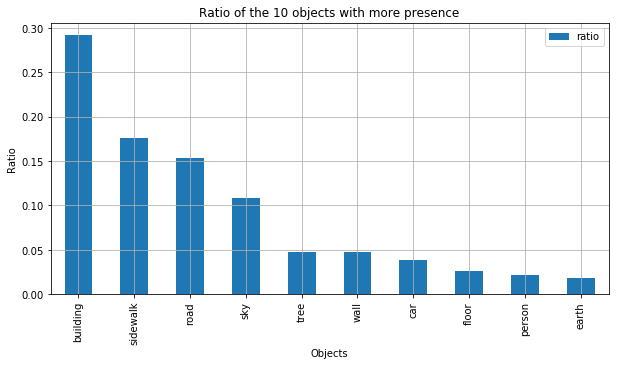

In [166]:
df_object_info.head(10).plot(x="summary_object",y="ratio",kind="bar",xlim=[0,3],figsize=[10,5],grid=True,title="Ratio of the 10 objects with more presence")
plt.xlabel("Objects")
plt.ylabel("Ratio")

In [170]:
#Getting frequency:
threshold=1e-20 #Just to consider all the objects.
df_features_freq=df_features.copy()
for feat in df_features_freq.columns:
    if feat!="id" and feat!="img_id" and feat!="feat_0":
        df_features_freq.loc[df_features_freq[feat] >=threshold, feat] = 1
        df_features_freq.loc[df_features_freq[feat] < threshold, feat] = 0
        
df_object_info_freq=pd.read_csv(object_info_dir)

new_column=[]
for i in range(150):
    new_column.append("feat_"+str(i+1))
df_object_info_freq["Name2"]=new_column
df_object_info_freq.columns=['old_id', 'old_ratio', 'train', 'val', 'object', 'feat']
del df_object_info_freq["train"]
del df_object_info_freq["val"]
del df_object_info_freq["old_id"]
del df_object_info_freq["old_ratio"]

df_object_info_freq["summary_object"]=df_object_info_freq["object"].str.split(", ").str[0]

freq_=[]
for feat in df_features_freq.columns:
    if feat!="id" and feat!="img_id" and feat!="feat_0":
        freq_.append(df_features_freq[feat].sum())
df_object_info_freq["frequency"]=freq_

df_object_info_freq=df_object_info_freq.sort_values(by=["frequency"],ascending=False).reset_index()
df_object_info_freq["id"]=list(range(1, 151))
cols=["id","feat","object","summary_object","frequency"]
df_object_info_freq=df_object_info_freq[cols]
df_object_info_freq.head(10)

id     feat                                             object  \
0   1   feat_2                                  building, edifice   
1   2  feat_12                                 sidewalk, pavement   
2   3   feat_3                                                sky   
3   4   feat_7                                        road, route   
4   5  feat_21           car, auto, automobile, machine, motorcar   
5   6   feat_5                                               tree   
6   7  feat_13  person, individual, someone, somebody, mortal,...   
7   8   feat_1                                               wall   
8   9   feat_4                                    floor, flooring   
9  10  feat_44                                    signboard, sign   

  summary_object  frequency  
0       building     1198.0  
1       sidewalk     1171.0  
2            sky     1141.0  
3           road     1135.0  
4            car      936.0  
5           tree      895.0  
6         person      855.0  
7           wall      840.0  
8          floor      654.0  
9      signboard      561.0

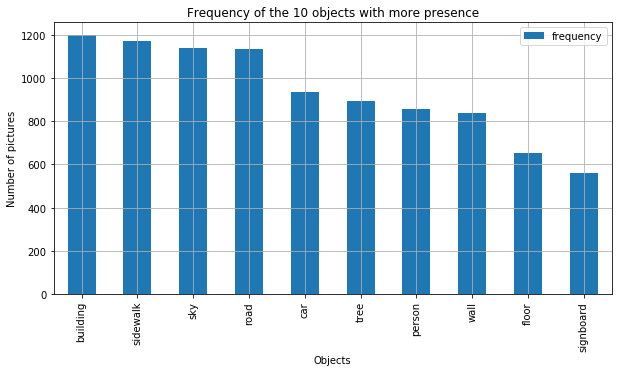

In [172]:
df_object_info_freq.head(10).plot(x="summary_object",y="frequency",kind="bar",xlim=[0,3],figsize=[10,5],grid=True,title="Frequency of the 10 objects with more presence")
plt.xlabel("Objects")
plt.ylabel("Number of pictures")

### Getting the ratio by modifying the feature data (binarization of the data: the object either appears or not)

#### Considering a threshold of 0.05

In [347]:
threshold=0.05

In [348]:
df_features_threshold=df_features.copy()

In [349]:
for feat in df_features_threshold.columns:
    if feat!="id" and feat!="img_id" and feat!="feat_0":
        df_features_threshold.loc[df_features_threshold[feat] >=threshold, feat] = 1
        df_features_threshold.loc[df_features_threshold[feat] < threshold, feat] = 0


In [350]:
df_features.head()

id                 img_id  feat_0    feat_1    feat_2    feat_3    feat_4  \
0   0  s_20140101_125134.jpg     0.0  0.007447  0.495103  0.075117  0.352118   
1   1  s_20140101_125419.jpg     0.0  0.000000  0.390094  0.314747  0.008074   
2   2  s_20140101_125819.jpg     0.0  0.000000  0.284519  0.148422  0.026618   
3   3  s_20140101_125835.jpg     0.0  0.000000  0.470173  0.035024  0.000000   
4   4  s_20140101_125939.jpg     0.0  0.006698  0.612354  0.063612  0.000000   

     feat_5  feat_6    feat_7    ...     feat_141  feat_142  feat_143  \
0  0.000359     0.0  0.022035    ...          0.0       0.0       0.0   
1  0.000000     0.0  0.089085    ...          0.0       0.0       0.0   
2  0.030529     0.0  0.025390    ...          0.0       0.0       0.0   
3  0.000000     0.0  0.112055    ...          0.0       0.0       0.0   
4  0.002196     0.0  0.181298    ...          0.0       0.0       0.0   

   feat_144  feat_145  feat_146  feat_147  feat_148  feat_149  feat_150  
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 153 columns]

In [351]:
df_features_threshold.head()

id                 img_id  feat_0  feat_1  feat_2  feat_3  feat_4  feat_5  \
0   0  s_20140101_125134.jpg     0.0     0.0     1.0     1.0     1.0     0.0   
1   1  s_20140101_125419.jpg     0.0     0.0     1.0     1.0     0.0     0.0   
2   2  s_20140101_125819.jpg     0.0     0.0     1.0     1.0     0.0     0.0   
3   3  s_20140101_125835.jpg     0.0     0.0     1.0     0.0     0.0     0.0   
4   4  s_20140101_125939.jpg     0.0     0.0     1.0     1.0     0.0     0.0   

   feat_6  feat_7    ...     feat_141  feat_142  feat_143  feat_144  feat_145  \
0     0.0     0.0    ...          0.0       0.0       0.0       0.0       0.0   
1     0.0     1.0    ...          0.0       0.0       0.0       0.0       0.0   
2     0.0     0.0    ...          0.0       0.0       0.0       0.0       0.0   
3     0.0     1.0    ...          0.0       0.0       0.0       0.0       0.0   
4     0.0     1.0    ...          0.0       0.0       0.0       0.0       0.0   

   feat_146  feat_147  feat_148  feat_149  feat_150  
0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0  

[5 rows x 153 columns]

In [89]:
df_object_info_threshold=pd.read_csv(object_info_dir)
df_object_info_threshold.dropna(inplace=True)

In [90]:
new_column=[]
for i in range(150):
    new_column.append("feat_"+str(i+1))
df_object_info_threshold["Name2"]=new_column
df_object_info_threshold.columns=['old_id', 'old_ratio', 'train', 'val', 'object', 'feat']
del df_object_info_threshold["train"]
del df_object_info_threshold["val"]
del df_object_info_threshold["old_id"]
del df_object_info_threshold["old_ratio"]

In [91]:
ratio_threshold=[]
freq_threshold=[]
for feat in df_features_threshold.columns:
    if feat!="id" and feat!="img_id" and feat!="feat_0":
        ratio_threshold.append(round(df_features_threshold[feat].sum()/len(df_features_threshold),4))
        freq_threshold.append(df_features_threshold[feat].sum())
df_object_info_threshold["ratio"]=ratio_threshold
df_object_info_threshold["frequency"]=freq_threshold

df_object_info_threshold=df_object_info_threshold.sort_values(by=["ratio"],ascending=False).reset_index()
df_object_info_threshold["id"]=list(range(1, 151))
cols=["id","feat","object","ratio","frequency"]
df_object_info_threshold=df_object_info_threshold[cols]

In [92]:
df_object_info_threshold.head(20)

id     feat                                             object   ratio  \
0    1   feat_2                                  building, edifice  0.9642   
1    2  feat_12                                 sidewalk, pavement  0.7975   
2    3   feat_7                                        road, route  0.6875   
3    4   feat_3                                                sky  0.6758   
4    5   feat_5                                               tree  0.2983   
5    6   feat_1                                               wall  0.2458   
6    7  feat_21           car, auto, automobile, machine, motorcar  0.2325   
7    8   feat_4                                    floor, flooring  0.1725   
8    9  feat_13  person, individual, someone, somebody, mortal,...  0.1325   
9   10  feat_14                                      earth, ground  0.0967   
10  11   feat_6                                            ceiling  0.0350   
11  12  feat_54                                      stairs, steps  0.0242   
12  13  feat_44                                    signboard, sign  0.0225   
13  14  feat_60                                stairway, staircase  0.0217   
14  15  feat_18                           plant, flora, plant life  0.0217   
15  16  feat_33                                     fence, fencing  0.0142   
16  17  feat_81  bus, autobus, coach, charabanc, double-decker,...  0.0133   
17  18  feat_17                                    mountain, mount  0.0125   
18  19  feat_94                                               pole  0.0108   
19  20  feat_10                                              grass  0.0100   

    frequency  
0      1157.0  
1       957.0  
2       825.0  
3       811.0  
4       358.0  
5       295.0  
6       279.0  
7       207.0  
8       159.0  
9       116.0  
10       42.0  
11       29.0  
12       27.0  
13       26.0  
14       26.0  
15       17.0  
16       16.0  
17       15.0  
18       13.0  
19       12.0

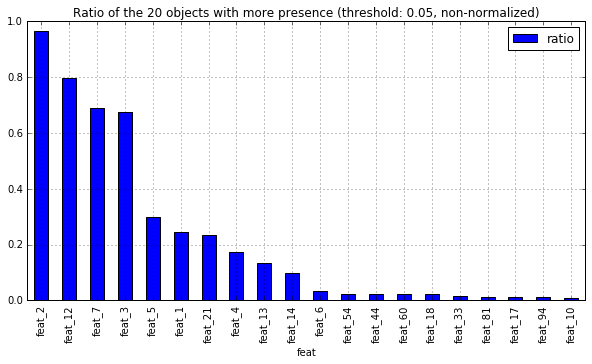

In [93]:
df_object_info_threshold.head(20).plot(x="feat",y="ratio",kind="bar",figsize=[10,5],grid=True,title="Ratio of the 20 objects with more presence (threshold: 0.05, non-normalized)")

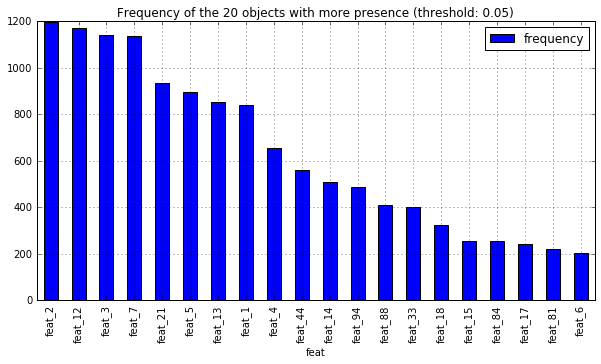

In [214]:
df_object_info_threshold.head(20).plot(x="feat",y="frequency",kind="bar",figsize=[10,5],grid=True,title="Frequency of the 20 objects with more presence (threshold: 0.05)")

#### Normalizing the binary data

In [355]:
df_features_threshold_norm=df_features_threshold.copy()

In [95]:
df_object_info_threshold_norm=pd.read_csv(object_info_dir)
df_object_info_threshold_norm.dropna(inplace=True)
new_column=[]
for i in range(150):
    new_column.append("feat_"+str(i+1))
df_object_info_threshold_norm["Name2"]=new_column
df_object_info_threshold_norm.columns=['old_id', 'old_ratio', 'train', 'val', 'object', 'feat']
del df_object_info_threshold_norm["train"]
del df_object_info_threshold_norm["val"]
del df_object_info_threshold_norm["old_id"]
del df_object_info_threshold_norm["old_ratio"]

In [356]:
list_id_feat_norm=list(df_features_threshold_norm["id"])
list_img_id_feat_norm=list(df_features_threshold_norm["img_id"])
del df_features_threshold_norm["img_id"]
del df_features_threshold_norm["id"]

In [357]:
#Normalizing
df_features_threshold_norm=df_features_threshold_norm.div(df_features_threshold_norm.sum(axis=1), axis=0)

In [98]:
ratio_threshold_norm=[]
for feat in df_features_threshold_norm.columns:
    if feat!="id" and feat!="img_id" and feat!="feat_0":
        ratio_threshold_norm.append(round(df_features_threshold_norm[feat].sum()/len(df_features_threshold_norm),4))
df_object_info_threshold_norm["ratio"]=ratio_threshold_norm

df_object_info_threshold_norm=df_object_info_threshold_norm.sort_values(by=["ratio"],ascending=False).reset_index()
df_object_info_threshold_norm["id"]=list(range(1, 151))
cols=["id","feat","object","ratio"]
df_object_info_threshold_norm=df_object_info_threshold_norm[cols]

In [99]:
df_object_info_threshold_norm.head(20)

id     feat                                             object   ratio
0    1   feat_2                                  building, edifice  0.2213
1    2  feat_12                                 sidewalk, pavement  0.1760
2    3   feat_7                                        road, route  0.1510
3    4   feat_3                                                sky  0.1476
4    5   feat_5                                               tree  0.0619
5    6   feat_1                                               wall  0.0545
6    7  feat_21           car, auto, automobile, machine, motorcar  0.0462
7    8   feat_4                                    floor, flooring  0.0365
8    9  feat_13  person, individual, someone, somebody, mortal,...  0.0254
9   10  feat_14                                      earth, ground  0.0193
10  11   feat_6                                            ceiling  0.0066
11  12  feat_54                                      stairs, steps  0.0060
12  13  feat_60                                stairway, staircase  0.0047
13  14  feat_18                           plant, flora, plant life  0.0040
14  15  feat_44                                    signboard, sign  0.0039
15  16  feat_33                                     fence, fencing  0.0027
16  17  feat_17                                    mountain, mount  0.0026
17  18  feat_81  bus, autobus, coach, charabanc, double-decker,...  0.0025
18  19  feat_94                                               pole  0.0020
19  20  feat_15                                  door, double door  0.0019

In [103]:
df_object_info_threshold_norm.head(20)['ratio'].sum()

0.9766

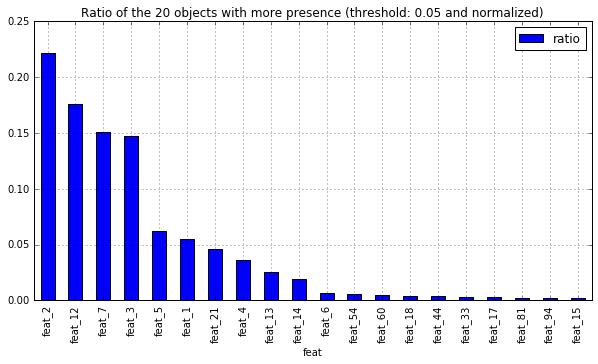

In [100]:
df_object_info_threshold_norm.head(20).plot(x="feat",y="ratio",kind="bar",figsize=[10,5],grid=True,title="Ratio of the 20 objects with more presence (threshold: 0.05 and normalized)")

In [359]:
df_features_threshold_norm["id"]=list_id_feat_norm
df_features_threshold_norm["img_id"]=list_img_id_feat_norm

# <span style="color:red"> Correlation </span>

##  <span style="color:blue"> Correlation between the 12 labels </span>

In [7]:
#Plot spearman correlation matrix among the labels (the same way Dr. Darshan did it)
label_list=['Polluted','Dangerous','Dirty','Quiet','Interesting','Accessible','Wealthy','Pretty','Picturesque','Preserved','Pleasant','Happy']
df_labels_new=df_labels.drop(['annotation', 'city',], axis=1)
df_labels_new=df_labels[label_list]
df_labels_new.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [388]:
#Checking p-values to determine if the values are statistically signicant
p_val_compare=0.001
print("The following values are not statistically significant at p<"+str(p_val_compare)+"\n")
for label in labels:
    labels_1=[x for x in labels if not x.startswith(label)]
    for label_1 in labels_1:
        if stats.spearmanr(df_labels[label],df_labels[label_1])[1]>p_val_compare:
            print(label+" <-> "+label_1)

The following values are not statistically significant at p<0.001

Accessible <-> Quiet
Wealthy <-> Quiet
Quiet <-> Accessible
Quiet <-> Wealthy


##  <span style="color:blue"> Image Segmentation (150 features) </span>

In [100]:
df_labels=df_labels.rename(index=str, columns={"annotation": "img_id"})

In [107]:
labels = [x for x in df_labels.columns.tolist() if (x != "img_id" and x!="city")]

In [108]:
labels

['Dangerous',
 'Dirty',
 'Pretty',
 'Preserved',
 'Accessible',
 'Interesting',
 'Picturesque',
 'Wealthy',
 'Quiet',
 'Polluted',
 'Pleasant',
 'Happy']

### <span style="color:green">No Pre-processing </span>

In [272]:
#Adding the names to the columns
#Getting the names of the 150 objects from the image segmentation dataset
df_object_150_names=pd.read_csv(object_info_dir)
df_object_150_names.dropna(inplace=True)
df_object_150_names["summary_object"]=df_object_150_names["Name"].str.split(", ").str[0]
object_150_image_seg=df_object_150_names["summary_object"].tolist()

In [274]:
df_features_w_names=df_features.drop(["id","feat_0"],axis=1).copy()
df_features_w_names.columns=["img_id"]+object_150_image_seg

In [276]:
df_features.head()

id                 img_id  feat_0    feat_1    feat_2    feat_3    feat_4  \
0   0  s_20140101_125134.jpg     0.0  0.007447  0.495103  0.075117  0.352118   
1   1  s_20140101_125419.jpg     0.0  0.000000  0.390094  0.314747  0.008074   
2   2  s_20140101_125819.jpg     0.0  0.000000  0.284519  0.148422  0.026618   
3   3  s_20140101_125835.jpg     0.0  0.000000  0.470173  0.035024  0.000000   
4   4  s_20140101_125939.jpg     0.0  0.006698  0.612354  0.063612  0.000000   

     feat_5  feat_6    feat_7    ...     feat_141  feat_142  feat_143  \
0  0.000359     0.0  0.022035    ...          0.0       0.0       0.0   
1  0.000000     0.0  0.089085    ...          0.0       0.0       0.0   
2  0.030529     0.0  0.025390    ...          0.0       0.0       0.0   
3  0.000000     0.0  0.112055    ...          0.0       0.0       0.0   
4  0.002196     0.0  0.181298    ...          0.0       0.0       0.0   

   feat_144  feat_145  feat_146  feat_147  feat_148  feat_149  feat_150  
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 153 columns]

In [277]:
df_features_w_names.head()

img_id      wall  building       sky     floor      tree  \
0  s_20140101_125134.jpg  0.007447  0.495103  0.075117  0.352118  0.000359   
1  s_20140101_125419.jpg  0.000000  0.390094  0.314747  0.008074  0.000000   
2  s_20140101_125819.jpg  0.000000  0.284519  0.148422  0.026618  0.030529   
3  s_20140101_125835.jpg  0.000000  0.470173  0.035024  0.000000  0.000000   
4  s_20140101_125939.jpg  0.006698  0.612354  0.063612  0.000000  0.002196   

   ceiling      road      bed   windowpane  ...   pier  crt screen  plate  \
0      0.0  0.022035  0.002386         0.0  ...    0.0         0.0    0.0   
1      0.0  0.089085  0.000000         0.0  ...    0.0         0.0    0.0   
2      0.0  0.025390  0.000000         0.0  ...    0.0         0.0    0.0   
3      0.0  0.112055  0.000000         0.0  ...    0.0         0.0    0.0   
4      0.0  0.181298  0.000000         0.0  ...    0.0         0.0    0.0   

   monitor  bulletin board  shower  radiator  glass  clock  flag  
0      0.0             0.0     0.0       0.0    0.0    0.0   0.0  
1      0.0             0.0     0.0       0.0    0.0    0.0   0.0  
2      0.0             0.0     0.0       0.0    0.0    0.0   0.0  
3      0.0             0.0     0.0       0.0    0.0    0.0   0.0  
4      0.0             0.0     0.0       0.0    0.0    0.0   0.0  

[5 rows x 151 columns]

In [279]:
#Without pre-processing
df_merge=pd.merge(df_features_w_names,df_labels,on="img_id")

In [280]:
df_merge.head()

img_id      wall  building       sky     floor      tree  \
0  s_20140101_125134.jpg  0.007447  0.495103  0.075117  0.352118  0.000359   
1  s_20140101_125419.jpg  0.000000  0.390094  0.314747  0.008074  0.000000   
2  s_20140101_125819.jpg  0.000000  0.284519  0.148422  0.026618  0.030529   
3  s_20140101_125835.jpg  0.000000  0.470173  0.035024  0.000000  0.000000   
4  s_20140101_125939.jpg  0.006698  0.612354  0.063612  0.000000  0.002196   

   ceiling      road      bed   windowpane  ...   Preserved  Accessible  \
0      0.0  0.022035  0.002386         0.0  ...         5.0         5.0   
1      0.0  0.089085  0.000000         0.0  ...         4.0         5.0   
2      0.0  0.025390  0.000000         0.0  ...         6.0         6.0   
3      0.0  0.112055  0.000000         0.0  ...         4.0         5.0   
4      0.0  0.181298  0.000000         0.0  ...         5.0         6.0   

   Interesting  Picturesque  Wealthy  Quiet  Polluted  Pleasant  Happy  city  
0          5.5          4.5      3.5    5.0       2.0       5.0    5.5    gc  
1          5.0          3.0      2.5    3.0       2.5       4.0    4.0    gc  
2          6.0          5.5      2.0    3.0       2.0       6.0    6.0    gc  
3          4.5          2.5      2.0    2.5       3.0       4.0    4.0    gc  
4          5.5          5.0      2.5    4.0       2.5       5.5    5.5    gc  

[5 rows x 164 columns]

In [281]:
corr_no_preprocessing=df_merge.drop(['img_id','city'], axis=1).corr(method='spearman')
corr_no_preprocessing[labels].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

/Users/lemr/anaconda/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


In [300]:
#Getting the "most" correlated features 
threshold_corr=0.12
dict_corr_feat_label=dict()
temp=[]
print("Number of correlated features for each label\n")
for column in corr_no_preprocessing[labels].columns.tolist():
    for row in corr_no_preprocessing[(corr_no_preprocessing[column]>=threshold_corr) | (corr_no_preprocessing[column]<=-threshold_corr)][column].index.tolist():
        if row not in labels:
            temp.append(str(row+": ")+str(round(corr_no_preprocessing[column][row],3)))
    dict_corr_feat_label[column]=temp
    print(str(column)+": " +str(len(temp))+" correlated features")
    temp=[]
print("\n\nMost correlated features:")
dict_corr_feat_label

Number of correlated features for each label

Dangerous: 14 correlated features
Dirty: 9 correlated features
Pretty: 11 correlated features
Preserved: 12 correlated features
Accessible: 16 correlated features
Interesting: 14 correlated features
Picturesque: 10 correlated features
Wealthy: 17 correlated features
Quiet: 24 correlated features
Polluted: 9 correlated features
Pleasant: 12 correlated features
Happy: 11 correlated features


Most correlated features:


{'Accessible': ['wall: -0.345',
  'building: -0.17',
  'tree: 0.297',
  'windowpane: -0.124',
  'sidewalk: 0.315',
  'person: 0.263',
  'earth: -0.138',
  'door: -0.211',
  'plant: 0.13',
  'curtain: -0.134',
  'painting: -0.179',
  'stairs: -0.193',
  'stairway: -0.165',
  'hovel: -0.138',
  'dirt track: -0.171',
  'ashcan: 0.123'],
 'Dangerous': ['wall: 0.181',
  'building: 0.129',
  'tree: -0.253',
  'road: 0.123',
  'sidewalk: -0.254',
  'person: -0.234',
  'plant: -0.155',
  'painting: 0.188',
  'base: -0.152',
  'bench: -0.184',
  'awning: -0.125',
  'dirt track: 0.134',
  'pole: 0.138',
  'ashcan: -0.124'],
 'Dirty': ['wall: 0.17',
  'tree: -0.227',
  'sidewalk: -0.216',
  'person: -0.151',
  'earth: 0.145',
  'plant: -0.147',
  'painting: 0.162',
  'bench: -0.154',
  'dirt track: 0.19'],
 'Happy': ['wall: -0.164',
  'tree: 0.222',
  'road: -0.148',
  'sidewalk: 0.176',
  'person: 0.225',
  'earth: -0.12',
  'plant: 0.167',
  'painting: -0.157',
  'bench: 0.145',
  'dirt track: 

In [407]:
#Checking p-values to determine if the values are statistically signicant
p_val_compare=0.05
print("The following values are not statistically significant at p<"+str(p_val_compare)+"\n")
for label in labels:
    for feat in df_features_w_names.drop(["img_id"],axis=1).columns.tolist():
        if stats.spearmanr(df_labels[label],df_features_w_names[feat])[1]>p_val_compare:
            print(label+" <-> "+feat)

The following values are not statistically significant at p<0.05

Dangerous <-> building
Dangerous <-> sky
Dangerous <-> floor
Dangerous <-> ceiling
Dangerous <-> road
Dangerous <-> bed 
Dangerous <-> windowpane
Dangerous <-> cabinet
Dangerous <-> earth
Dangerous <-> table
Dangerous <-> mountain
Dangerous <-> plant
Dangerous <-> curtain
Dangerous <-> water
Dangerous <-> sofa
Dangerous <-> shelf
Dangerous <-> house
Dangerous <-> sea
Dangerous <-> mirror
Dangerous <-> rug
Dangerous <-> field
Dangerous <-> seat
Dangerous <-> rock
Dangerous <-> wardrobe
Dangerous <-> lamp
Dangerous <-> bathtub
Dangerous <-> railing
Dangerous <-> cushion
Dangerous <-> base
Dangerous <-> box
Dangerous <-> column
Dangerous <-> signboard
Dangerous <-> chest of drawers
Dangerous <-> counter
Dangerous <-> sand
Dangerous <-> sink
Dangerous <-> skyscraper
Dangerous <-> fireplace
Dangerous <-> refrigerator
Dangerous <-> grandstand
Dangerous <-> path
Dangerous <-> case
Dangerous <-> pool table
Dangerous <-> pillow
D

/Users/lemr/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/lemr/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/lemr/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/lemr/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/lemr/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Dirty <-> sofa
Dirty <-> shelf
Dirty <-> sea
Dirty <-> mirror
Dirty <-> rug
Dirty <-> field
Dirty <-> seat
Dirty <-> rock
Dirty <-> wardrobe
Dirty <-> lamp
Dirty <-> bathtub
Dirty <-> cushion
Dirty <-> base
Dirty <-> box
Dirty <-> column
Dirty <-> signboard
Dirty <-> chest of drawers
Dirty <-> counter
Dirty <-> sand
Dirty <-> sink
Dirty <-> skyscraper
Dirty <-> fireplace
Dirty <-> refrigerator
Dirty <-> grandstand
Dirty <-> path
Dirty <-> runway
Dirty <-> case
Dirty <-> pool table
Dirty <-> pillow
Dirty <-> screen door
Dirty <-> river
Dirty <-> bridge
Dirty <-> bookcase
Dirty <-> blind
Dirty <-> coffee table
Dirty <-> toilet
Dirty <-> flower
Dirty <-> bench
Dirty <-> countertop
Dirty <-> stove
Dirty <-> palm
Dirty <-> swivel chair
Dirty <-> boat
Dirty <-> bar
Dirty <-> arcade machine
Dirty <-> hovel
Dirty <-> bus
Dirty <-> towel
Dirty <-> light
Dirty <-> truck
Dirty <-> tower
Dirty <-> chandelier
Dirty <-> awning
Dirty <-> streetlight
Dirty <-> booth
Dirty <-> television
Dirty <-> airp

Interesting <-> bed 
Interesting <-> windowpane
Interesting <-> grass
Interesting <-> cabinet
Interesting <-> person
Interesting <-> earth
Interesting <-> door
Interesting <-> table
Interesting <-> curtain
Interesting <-> water
Interesting <-> painting
Interesting <-> sofa
Interesting <-> shelf
Interesting <-> mirror
Interesting <-> field
Interesting <-> armchair
Interesting <-> seat
Interesting <-> fence
Interesting <-> wardrobe
Interesting <-> lamp
Interesting <-> bathtub
Interesting <-> cushion
Interesting <-> base
Interesting <-> box
Interesting <-> column
Interesting <-> signboard
Interesting <-> chest of drawers
Interesting <-> counter
Interesting <-> sand
Interesting <-> sink
Interesting <-> skyscraper
Interesting <-> fireplace
Interesting <-> refrigerator
Interesting <-> path
Interesting <-> runway
Interesting <-> pool table
Interesting <-> pillow
Interesting <-> screen door
Interesting <-> river
Interesting <-> bridge
Interesting <-> bookcase
Interesting <-> blind
Interesting 

Quiet <-> cushion
Quiet <-> base
Quiet <-> box
Quiet <-> column
Quiet <-> chest of drawers
Quiet <-> counter
Quiet <-> sink
Quiet <-> skyscraper
Quiet <-> fireplace
Quiet <-> refrigerator
Quiet <-> grandstand
Quiet <-> path
Quiet <-> runway
Quiet <-> case
Quiet <-> pool table
Quiet <-> pillow
Quiet <-> screen door
Quiet <-> river
Quiet <-> bookcase
Quiet <-> blind
Quiet <-> coffee table
Quiet <-> toilet
Quiet <-> flower
Quiet <-> hill
Quiet <-> countertop
Quiet <-> stove
Quiet <-> palm
Quiet <-> swivel chair
Quiet <-> boat
Quiet <-> bar
Quiet <-> towel
Quiet <-> tower
Quiet <-> chandelier
Quiet <-> streetlight
Quiet <-> booth
Quiet <-> television
Quiet <-> airplane
Quiet <-> dirt track
Quiet <-> apparel
Quiet <-> land
Quiet <-> escalator
Quiet <-> ottoman
Quiet <-> bottle
Quiet <-> poster
Quiet <-> stage
Quiet <-> ship
Quiet <-> fountain
Quiet <-> conveyer belt
Quiet <-> canopy
Quiet <-> washer
Quiet <-> plaything
Quiet <-> stool
Quiet <-> barrel
Quiet <-> basket
Quiet <-> waterfall
Qu

Happy <-> sconce
Happy <-> vase
Happy <-> traffic light
Happy <-> tray
Happy <-> ashcan
Happy <-> fan
Happy <-> pier
Happy <-> crt screen
Happy <-> plate
Happy <-> monitor
Happy <-> bulletin board
Happy <-> shower
Happy <-> radiator
Happy <-> glass
Happy <-> clock
Happy <-> flag


##  <span style="color:blue"> places205 (205 features) </span>

In [437]:
df_features_places205 = pd.read_csv(csv_feat_dir_places205,sep=",")

In [471]:
#Getting the names of the features just to make the analysis easier
objects_places205=pd.read_csv("datasets/categoryIndex_places205.csv",header=None)
objects_places205["summary_object"]=objects_places205[0].str.split("/",2).str[2]
objects_places205["summary_object"]=objects_places205["summary_object"].str.split(" ").str[0]
objects_places205["summary_object"]=objects_places205["summary_object"].str.replace("/","_")
names_places205=objects_places205["summary_object"].tolist()

In [409]:
df_features_places205.head()

image      prob  feat_places205_1  feat_places205_2  \
0  s_20140101_125134.jpg  0.877149          0.000100          0.000006   
1  s_20140101_125419.jpg  0.294856          0.001102          0.000028   
2  s_20140101_125819.jpg  0.748392          0.003951          0.000007   
3  s_20140101_125835.jpg  0.124242          0.000294          0.001060   
4  s_20140101_125939.jpg  0.765077          0.000827          0.000017   

   feat_places205_3  feat_places205_4  feat_places205_5  feat_places205_6  \
0          0.877149          0.000044          0.000086          0.000002   
1          0.294856          0.000114          0.000283          0.000011   
2          0.023215          0.000105          0.000565          0.000006   
3          0.074381          0.000237          0.028027          0.000167   
4          0.765077          0.000071          0.000867          0.000012   

   feat_places205_7  feat_places205_8         ...          feat_places205_196  \
0          0.000048          0.000778         ...                    0.000209   
1          0.000479          0.000792         ...                    0.000085   
2          0.000772          0.001227         ...                    0.000021   
3          0.000605          0.001721         ...                    0.000331   
4          0.000655          0.006800         ...                    0.000024   

   feat_places205_197  feat_places205_198  feat_places205_199  \
0            0.000031            0.000027            0.000006   
1            0.000343            0.001344            0.000016   
2            0.000082            0.000093            0.000004   
3            0.002835            0.000720            0.000076   
4            0.002500            0.000037            0.000005   

   feat_places205_200  feat_places205_201  feat_places205_202  \
0            0.000102        2.400000e-07            0.000002   
1            0.002066        4.060000e-06            0.000048   
2            0.000174        2.000000e-06            0.000004   
3            0.004734        7.700000e-06            0.000118   
4            0.000788        1.060000e-06            0.000014   

   feat_places205_203  feat_places205_204  feat_places205_205  
0            0.000005            0.000048            0.000130  
1            0.000045            0.000321            0.000814  
2            0.000004            0.000072            0.000161  
3            0.000430            0.002927            0.000330  
4            0.000041            0.000214            0.000094  

[5 rows x 207 columns]

In [472]:
df_features_places205.columns=["img_id","prob"]+names_places205

In [473]:
df_features_places205.head()

img_id      prob     abbey  airport_terminal     alley  \
0  s_20140101_125134.jpg  0.877149  0.000100          0.000006  0.877149   
1  s_20140101_125419.jpg  0.294856  0.001102          0.000028  0.294856   
2  s_20140101_125819.jpg  0.748392  0.003951          0.000007  0.023215   
3  s_20140101_125835.jpg  0.124242  0.000294          0.001060  0.074381   
4  s_20140101_125939.jpg  0.765077  0.000827          0.000017  0.765077   

   amphitheater  amusement_park  aquarium  aqueduct      arch    ...     \
0      0.000044        0.000086  0.000002  0.000048  0.000778    ...      
1      0.000114        0.000283  0.000011  0.000479  0.000792    ...      
2      0.000105        0.000565  0.000006  0.000772  0.001227    ...      
3      0.000237        0.028027  0.000167  0.000605  0.001721    ...      
4      0.000071        0.000867  0.000012  0.000655  0.006800    ...      

    veranda   viaduct   volcano  waiting_room  water_tower  watering_hole  \
0  0.000209  0.000031  0.000027      0.000006     0.000102   2.400000e-07   
1  0.000085  0.000343  0.001344      0.000016     0.002066   4.060000e-06   
2  0.000021  0.000082  0.000093      0.000004     0.000174   2.000000e-06   
3  0.000331  0.002835  0.000720      0.000076     0.004734   7.700000e-06   
4  0.000024  0.002500  0.000037      0.000005     0.000788   1.060000e-06   

   wheat_field  wind_farm  windmill      yard  
0     0.000002   0.000005  0.000048  0.000130  
1     0.000048   0.000045  0.000321  0.000814  
2     0.000004   0.000004  0.000072  0.000161  
3     0.000118   0.000430  0.002927  0.000330  
4     0.000014   0.000041  0.000214  0.000094  

[5 rows x 207 columns]

In [474]:
df_merge_places205=pd.merge(df_features_places205,df_labels,on="img_id")

In [475]:
df_merge_places205.head()

img_id      prob     abbey  airport_terminal     alley  \
0  s_20140101_125134.jpg  0.877149  0.000100          0.000006  0.877149   
1  s_20140101_125419.jpg  0.294856  0.001102          0.000028  0.294856   
2  s_20140101_125819.jpg  0.748392  0.003951          0.000007  0.023215   
3  s_20140101_125835.jpg  0.124242  0.000294          0.001060  0.074381   
4  s_20140101_125939.jpg  0.765077  0.000827          0.000017  0.765077   

   amphitheater  amusement_park  aquarium  aqueduct      arch  ...   \
0      0.000044        0.000086  0.000002  0.000048  0.000778  ...    
1      0.000114        0.000283  0.000011  0.000479  0.000792  ...    
2      0.000105        0.000565  0.000006  0.000772  0.001227  ...    
3      0.000237        0.028027  0.000167  0.000605  0.001721  ...    
4      0.000071        0.000867  0.000012  0.000655  0.006800  ...    

   Preserved  Accessible  Interesting  Picturesque  Wealthy  Quiet  Polluted  \
0        5.0         5.0          5.5          4.5      3.5    5.0       2.0   
1        4.0         5.0          5.0          3.0      2.5    3.0       2.5   
2        6.0         6.0          6.0          5.5      2.0    3.0       2.0   
3        4.0         5.0          4.5          2.5      2.0    2.5       3.0   
4        5.0         6.0          5.5          5.0      2.5    4.0       2.5   

   Pleasant  Happy  city  
0       5.0    5.5    gc  
1       4.0    4.0    gc  
2       6.0    6.0    gc  
3       4.0    4.0    gc  
4       5.5    5.5    gc  

[5 rows x 220 columns]

In [493]:
corr_no_preprocessing_places205=df_merge_places205.drop(['img_id','city',"prob"], axis=1).corr(method='spearman')
corr_no_preprocessing_places205[labels].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

In [490]:
#Getting the "most" correlated features 
threshold_corr=0.325
dict_corr_feat_205_label=dict()
temp=[]
print("Number of correlated features for each label\n")
for column in corr_no_preprocessing_places205[labels].columns.tolist():
    for row in corr_no_preprocessing_places205[(corr_no_preprocessing_places205[column]>=threshold_corr) | (corr_no_preprocessing_places205[column]<=-threshold_corr)][column].index.tolist():
        if row not in labels:
            temp.append(str(row+": ")+str(round(corr_no_preprocessing_places205[column][row],3)))
    dict_corr_feat_205_label[column]=temp
    print(str(column)+": " +str(len(temp))+" correlated features")
    temp=[]
print("\n\nMost correlated features:")
dict_corr_feat_205_label

Number of correlated features for each label

Dangerous: 14 correlated features
Dirty: 5 correlated features
Pretty: 17 correlated features
Preserved: 19 correlated features
Accessible: 39 correlated features
Interesting: 11 correlated features
Picturesque: 12 correlated features
Wealthy: 32 correlated features
Quiet: 58 correlated features
Polluted: 3 correlated features
Pleasant: 16 correlated features
Happy: 19 correlated features


Most correlated features:


{'Accessible': ['abbey: 0.371',
  'apartment_building_outdoor: 0.377',
  'ballroom: 0.423',
  'banquet_hall: 0.395',
  'bar: 0.336',
  'basement: -0.388',
  'basilica: 0.428',
  'botanical_garden: 0.406',
  'building_facade: 0.379',
  'cafeteria: 0.367',
  'conference_center: 0.369',
  'courthouse: 0.483',
  'cathedral_outdoor: 0.465',
  'church_outdoor: 0.448',
  'fairway: 0.333',
  'food_court: 0.384',
  'formal_garden: 0.365',
  'fountain: 0.401',
  'golf_course: 0.34',
  'hospital: 0.335',
  'hotel_outdoor: 0.525',
  'ice_skating_rink_outdoor: 0.354',
  'inn_outdoor: 0.461',
  'mansion: 0.392',
  'martial_arts_gym: 0.391',
  'market_outdoor: 0.339',
  'monastery_outdoor: 0.347',
  'office_building: 0.404',
  'pagoda: 0.346',
  'palace: 0.433',
  'pavilion: 0.378',
  'picnic_area: 0.328',
  'plaza: 0.585',
  'restaurant: 0.366',
  'restaurant_patio: 0.423',
  'skyscraper: 0.361',
  'stage_indoor: 0.332',
  'topiary_garden: 0.374',
  'tower: 0.379'],
 'Dangerous': ['ballroom: -0.33',

In [492]:
#Checking p-values to determine if the values are statistically signicant
p_val_compare=0.05
print("The following values are not statistically significant at p<"+str(p_val_compare)+"\n")
for label in labels:
    for feat in df_features_places205.drop(["img_id","prob"],axis=1).columns.tolist():
        if stats.spearmanr(df_labels[label],df_features_places205[feat])[1]>p_val_compare:
            print(label+" <-> "+feat)

The following values are not statistically significant at p<0.05

Dangerous <-> art_gallery
Dangerous <-> art_studio
Dangerous <-> badlands
Dangerous <-> bamboo_forest
Dangerous <-> bayou
Dangerous <-> bedroom
Dangerous <-> bowling_alley
Dangerous <-> bridge
Dangerous <-> bus_interior
Dangerous <-> butchers_shop
Dangerous <-> canyon
Dangerous <-> classroom
Dangerous <-> closet
Dangerous <-> construction_site
Dangerous <-> corn_field
Dangerous <-> creek
Dangerous <-> crevasse
Dangerous <-> crosswalk
Dangerous <-> dam
Dangerous <-> driveway
Dangerous <-> desert_sand
Dangerous <-> desert_vegetation
Dangerous <-> doorway_outdoor
Dangerous <-> engine_room
Dangerous <-> excavation
Dangerous <-> fire_escape
Dangerous <-> fire_station
Dangerous <-> forest_path
Dangerous <-> forest_road
Dangerous <-> garbage_dump
Dangerous <-> gas_station
Dangerous <-> highway
Dangerous <-> hospital_room
Dangerous <-> iceberg
Dangerous <-> kasbah
Dangerous <-> kitchen
Dangerous <-> laundromat
Dangerous <-> mote

Interesting <-> schoolhouse
Interesting <-> sea_cliff
Interesting <-> shower
Interesting <-> ski_resort
Interesting <-> ski_slope
Interesting <-> snowfield
Interesting <-> stadium_baseball
Interesting <-> stadium_football
Interesting <-> television_studio
Interesting <-> tower
Interesting <-> valley
Interesting <-> vegetable_garden
Interesting <-> veranda
Interesting <-> volcano
Interesting <-> waiting_room
Interesting <-> watering_hole
Interesting <-> windmill
Picturesque <-> airport_terminal
Picturesque <-> aquarium
Picturesque <-> aqueduct
Picturesque <-> art_gallery
Picturesque <-> art_studio
Picturesque <-> assembly_line
Picturesque <-> apartment_building_outdoor
Picturesque <-> badlands
Picturesque <-> bamboo_forest
Picturesque <-> bar
Picturesque <-> baseball_field
Picturesque <-> bayou
Picturesque <-> beauty_salon
Picturesque <-> bedroom
Picturesque <-> boardwalk
Picturesque <-> boat_deck
Picturesque <-> bowling_alley
Picturesque <-> boxing_ring
Picturesque <-> bridge
Picturesq

Pleasant <-> track_outdoor
Pleasant <-> train_station_platform
Pleasant <-> underwater_coral_reef
Pleasant <-> valley
Pleasant <-> vegetable_garden
Pleasant <-> veranda
Pleasant <-> water_tower
Pleasant <-> watering_hole
Pleasant <-> wheat_field
Pleasant <-> wind_farm
Pleasant <-> yard
Happy <-> airport_terminal
Happy <-> aquarium
Happy <-> art_gallery
Happy <-> art_studio
Happy <-> assembly_line
Happy <-> badlands
Happy <-> bamboo_forest
Happy <-> baseball_field
Happy <-> bayou
Happy <-> bedroom
Happy <-> boat_deck
Happy <-> bookstore
Happy <-> bowling_alley
Happy <-> boxing_ring
Happy <-> bridge
Happy <-> butchers_shop
Happy <-> bakery_shop
Happy <-> candy_store
Happy <-> canyon
Happy <-> cemetery
Happy <-> classroom
Happy <-> clothing_store
Happy <-> coast
Happy <-> cockpit
Happy <-> corn_field
Happy <-> creek
Happy <-> crevasse
Happy <-> crosswalk
Happy <-> dam
Happy <-> dock
Happy <-> dorm_room
Happy <-> driveway
Happy <-> desert_sand
Happy <-> desert_vegetation
Happy <-> doorway_

##  <span style="color:blue"> Continue analysis on Image Segmentation (150 features) </span>

### Binarizing

In [398]:
df_temp=df_features_threshold.drop(['id','feat_0'],axis=1).copy()
df_merge=pd.merge(df_temp,df_labels,on="img_id")
df_merge.corr(method="spearman")[labels].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

### Binarizing and Normalizing

In [378]:
df_temp=df_features_threshold_norm.drop(['feat_0'],axis=1).copy()
df_temp=pd.merge(df_temp,df_labels,on="img_id")
df_temp=df_temp.corr(method="spearman")[labels].dropna(axis=0)
df_temp.head(10)

Dangerous     Dirty    Pretty  Preserved  Accessible  Interesting  \
feat_1    0.206875  0.163761 -0.150626  -0.196512   -0.338437     0.036851   
feat_2    0.103589  0.073544 -0.041772  -0.040571   -0.062361    -0.012091   
feat_3    0.036980  0.022343  0.010189   0.022432    0.089734    -0.064174   
feat_4   -0.083767 -0.076959  0.054917   0.062890   -0.027897     0.117761   
feat_5   -0.289228 -0.263780  0.253954   0.240083    0.293088     0.124120   
feat_6   -0.020891 -0.034021  0.008384   0.029676    0.017281     0.078244   
feat_7    0.057622  0.046058 -0.096499  -0.050292    0.075184    -0.230940   
feat_8    0.005210  0.002582 -0.016073  -0.005132   -0.021865     0.016639   
feat_9   -0.021347 -0.015266  0.032637   0.016104    0.016391     0.005486   
feat_10  -0.015677 -0.041279  0.032542   0.022352   -0.001563     0.038914   

         Picturesque   Wealthy     Quiet  Polluted  Pleasant     Happy  
feat_1     -0.099809 -0.288885  0.270497  0.021571 -0.144508 -0.164554  
feat_2     -0.000025 -0.116085  0.172225 -0.001327 -0.042564 -0.045074  
feat_3      0.000712  0.053685 -0.146530  0.071032 -0.003509  0.002306  
feat_4      0.071287 -0.004226  0.124640 -0.133620  0.089481  0.074125  
feat_5      0.225874  0.273760  0.114291 -0.179956  0.250972  0.260667  
feat_6      0.023918  0.018699 -0.051170 -0.082470  0.024635  0.023720  
feat_7     -0.126899 -0.023167 -0.051920  0.115210 -0.102678 -0.089970  
feat_8     -0.004360 -0.016588  0.053135  0.000147 -0.029345 -0.017474  
feat_9      0.015243  0.023286  0.018828 -0.018656  0.033904  0.039739  
feat_10     0.021284  0.031576  0.052844 -0.057979  0.010304  0.021578

## PCA

#### No pre-processing

In [423]:
img_id_list=list(df_features['img_id'])
x=df_features.drop(["id","img_id","feat_0"],axis=1)
pca = sklearn.decomposition.PCA(n_components=26, svd_solver='full',whiten=True)
pca.fit(x)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
X=pca.transform(x)

[ 0.31741079  0.21842771  0.15223374  0.0822786   0.05789498  0.03588518
  0.03296298  0.02905579  0.01992723  0.01048272  0.00602239  0.00440659
  0.00404303  0.00287556  0.00226699  0.00182493  0.00161868  0.0014488
  0.00144156  0.00131261  0.00124325  0.00116146  0.00112487  0.00103118
  0.00096827  0.00092535]
0.990275248928


In [424]:
temp=[]
for i in range(1,27,1):
    temp.append("feat_"+str(i))
df_test=pd.DataFrame(X).copy()
df_test.columns=temp
df_test['img_id']=img_id_list
df_test.to_csv("datasets/150_feat_pca_no_preprocess_26PC.csv",index=False,sep=",")
df_test=pd.merge(df_test,df_labels,on="img_id")
df_test.corr(method='spearman')[labels].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

#### Binarizing and normalizing

In [377]:
img_id_list=list(df_features['img_id'])
x=df_features_threshold.drop(["id","img_id","feat_0"],axis=1).copy()
pca = sklearn.decomposition.PCA(n_components=43, svd_solver='full',whiten=True)
pca.fit(x)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
X=pca.transform(x)

df_test=pd.DataFrame(X).copy()
df_test['img_id']=img_id_list
df_test=pd.merge(df_test,df_labels,on="img_id")
df_test.corr(method='spearman')[labels].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))


[ 0.21264131  0.12890712  0.09572353  0.08688423  0.0836242   0.06189017
  0.05689872  0.05451466  0.04416901  0.02073851  0.01353697  0.01316198
  0.01207734  0.01183068  0.0084799   0.00815424  0.00685845  0.00627915
  0.00571212  0.00507409  0.00498488  0.00475911  0.00459633  0.0038238
  0.00361311  0.00351824  0.00316783  0.00300897  0.00264776  0.00217577
  0.00213926  0.00208955  0.00175205  0.00174266  0.00169481  0.00150603
  0.00111729  0.00089788  0.00088763  0.00088474  0.0008781   0.00087455
  0.00087015]
0.990786890358


In [379]:
#Binarizing
img_id_list=list(df_features['img_id'])
x=df_features.drop(["id","feat_0","img_id"],axis=1).copy()

binarizer = sklearn.preprocessing.Binarizer(threshold=0.5).fit(x)
x_bin=binarizer.transform(x)

#Applying PCA
pca = sklearn.decomposition.PCA(n_components=5, svd_solver='full')
pca.fit(x_bin)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
X=pca.transform(x_bin)

df_test=pd.DataFrame(X).copy()
df_test['img_id']=img_id_list
df_test=pd.merge(df_test,df_labels,on="img_id")
df_test.corr(method='spearman')[labels].style.format("{:.2}").background_gradient(cmap="coolwarm")

[ 0.79072431  0.07837767  0.07171791  0.03282743  0.01316993]
0.986817242995


### Applying ZCA + PCA


In [380]:
#Function got from https://gist.github.com/iborko/5d9c2c16004ce8b926ea
def zca_whiten(X):
    """
    Applies ZCA whitening to the data (X)
    http://xcorr.net/2011/05/27/whiten-a-matrix-matlab-code/

    X: numpy 2d array
        input data, rows are data points, columns are features

    Returns: ZCA whitened 2d array
    """
    assert(X.ndim == 2)
    EPS = 10e-5

    #   covariance matrix
    cov = np.dot(X.T, X)
    #   d = (lambda1, lambda2, ..., lambdaN)
    d, E = np.linalg.eigh(cov)
    #   D = diag(d) ^ (-1/2)
    D = np.diag(1. / np.sqrt(d + EPS))
    #   W_zca = E * D * E.T
    W = np.dot(np.dot(E, D), E.T)

    X_white = np.dot(X, W)

    return X_white

In [370]:
#Applying ZCA

In [434]:
x=zca_whiten(df_features.drop(["id","feat_0","img_id"],axis=1))

In [435]:
img_id_list=list(df_features['img_id'])
df_test=pd.DataFrame(x).copy()
temp=[]
for i in range(1,151,1):
    temp.append("feat_"+str(i))
df_test.columns=temp
df_test['img_id']=img_id_list
df_test.to_csv("datasets/150_feat_zca.csv",index=False,sep=",")
df_test=pd.merge(df_test,df_labels,on="img_id")
df_test.corr(method='spearman')[labels].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

In [384]:
#Applying PCA
pca = sklearn.decomposition.PCA(n_components=120, svd_solver='full',whiten=True)
pca.fit(x)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
X=pca.transform(x)

[ 0.00978237  0.00978236  0.00978231  0.00978229  0.00978224  0.00978216
  0.00978214  0.00978209  0.00978198  0.00978145  0.00978068  0.00978052
  0.00978036  0.00977888  0.00977864  0.00977742  0.00977714  0.00977676
  0.00977654  0.0097759   0.00977545  0.00977521  0.00977474  0.00977443
  0.00977397  0.00977357  0.00977313  0.00977194  0.00977036  0.0097701
  0.00976903  0.00976668  0.00976615  0.0097648   0.00976184  0.00975933
  0.00975615  0.00975161  0.00974879  0.00974755  0.00973407  0.00973361
  0.00972647  0.00972434  0.00972312  0.00971799  0.00971668  0.00971418
  0.00971211  0.00970808  0.00970634  0.00969237  0.0096902   0.00968283
  0.00967774  0.00966998  0.00966697  0.00965603  0.00965341  0.00963353
  0.00956566  0.00955696  0.00955395  0.00954426  0.00954076  0.0095088
  0.00950437  0.00948469  0.00945517  0.00939553  0.00937886  0.0093476
  0.00931688  0.00929683  0.00924679  0.00923102  0.00920425  0.00917315
  0.00905515  0.00885177  0.00875895  0.00848291  0.00

In [385]:
df_test=pd.DataFrame(X).copy()
df_test['img_id']=img_id_list
df_test=pd.merge(df_test,df_labels,on="img_id")
df_test.corr(method='spearman')[labels].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

### Removing features after binarizing

In [386]:
x=df_features.drop(["id","feat_0","img_id"],axis=1).copy()
binarizer = sklearn.preprocessing.Binarizer(threshold=0.05).fit(x)
x_bin=binarizer.transform(x)

df_test_remove=pd.DataFrame(x_bin).copy()
for feat in df_test_remove.columns:
        if sum(df_test_remove[feat])==0:
            del df_test_remove[feat]
print(df_test_remove.shape)

(1200, 63)


In [387]:
#Normalizing
df_test_remove=df_test_remove.div((df_test_remove).sum(axis=1), axis=0)

In [388]:
pca = sklearn.decomposition.PCA(n_components=37, svd_solver='full',whiten=True)
pca.fit(df_test_remove)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
X=pca.transform(df_test_remove)

[ 0.22031469  0.13872745  0.11192937  0.1054817   0.08148488  0.06520516
  0.05226266  0.0475893   0.04220908  0.01920467  0.01288417  0.01066272
  0.00944405  0.00753264  0.00702115  0.00589347  0.00520136  0.00452351
  0.00401604  0.00366271  0.0035051   0.00329114  0.00309406  0.00275596
  0.0026912   0.00246221  0.00238225  0.00237449  0.00180414  0.00167507
  0.00159234  0.00153371  0.00144353  0.001342    0.0012265   0.00102745
  0.00090151]
0.990353458329


In [389]:
df_test=pd.DataFrame(X).copy()
df_test['img_id']=img_id_list
df_test=pd.merge(df_test,df_labels,on="img_id")
df_test.corr(method='spearman')[labels].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

### ICA

In [391]:
ica=sklearn.decomposition.FastICA()
ica.fit(df_features.drop(["id","feat_0","img_id"],axis=1))
x=ica.transform(df_features.drop(["id","feat_0","img_id"],axis=1))
pca=sklearn.decomposition.PCA(n_components=140, svd_solver='full',whiten=True)
pca.fit(x)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
X=pca.transform(x)


[ 0.00717479  0.00712889  0.00712014  0.00705342  0.0070443   0.00704361
  0.00704091  0.0070407   0.00704004  0.00704001  0.00704     0.00703999
  0.00703999  0.00703999  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998  0.00703998
  0.00703998  0.00703998  0.00703998  0.00703998  0

In [392]:
df_test=pd.DataFrame(x).copy()
df_test['img_id']=img_id_list
df_test=pd.merge(df_test,df_labels,on="img_id")
df_test.corr(method='spearman')[labels].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

# <span style="color:red"> Classification task </span>

In [4]:
df_labels.head()

annotation  Dangerous  Dirty  Pretty  Preserved  Accessible  \
0  s_20140101_125134.jpg        2.0    2.0     5.0        5.0         5.0   
1  s_20140101_125419.jpg        2.5    3.0     3.0        4.0         5.0   
2  s_20140101_125819.jpg        2.0    2.5     5.0        6.0         6.0   
3  s_20140101_125835.jpg        4.0    4.0     3.0        4.0         5.0   
4  s_20140101_125939.jpg        3.0    3.0     5.0        5.0         6.0   

   Interesting  Picturesque  Wealthy  Quiet  Polluted  Pleasant  Happy city  
0          5.5          4.5      3.5    5.0       2.0       5.0    5.5   gc  
1          5.0          3.0      2.5    3.0       2.5       4.0    4.0   gc  
2          6.0          5.5      2.0    3.0       2.0       6.0    6.0   gc  
3          4.5          2.5      2.0    2.5       3.0       4.0    4.0   gc  
4          5.5          5.0      2.5    4.0       2.5       5.5    5.5   gc

### Dangerous, Dirty & Interesting

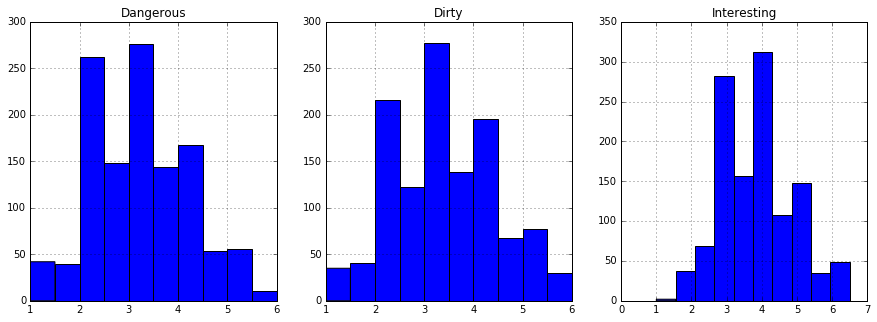

In [5]:
plt.subplot(1,3,1)
plt.title("Dangerous")
df_labels['Dangerous'].hist(figsize=[15,5],grid=True)
plt.subplot(1,3,2)
plt.title("Dirty")
df_labels['Dirty'].hist(figsize=[15,5],grid=True)
plt.subplot(1,3,3)
plt.title("Interesting")
df_labels['Interesting'].hist(figsize=[15,5],grid=True)

### Polluted, Accessible & Happy

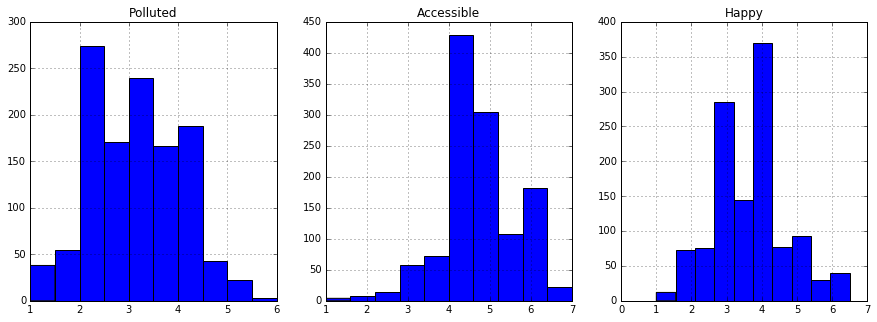

In [68]:
plt.subplot(1,3,1)
plt.title("Polluted")
df_labels['Polluted'].hist(figsize=[15,5],grid=True)
plt.subplot(1,3,2)
plt.title("Accessible")
df_labels['Accessible'].hist(figsize=[15,5],grid=True)
plt.subplot(1,3,3)
plt.title("Happy")
df_labels['Happy'].hist(figsize=[15,5],grid=True)

### Quiet, Pretty, Picturesque

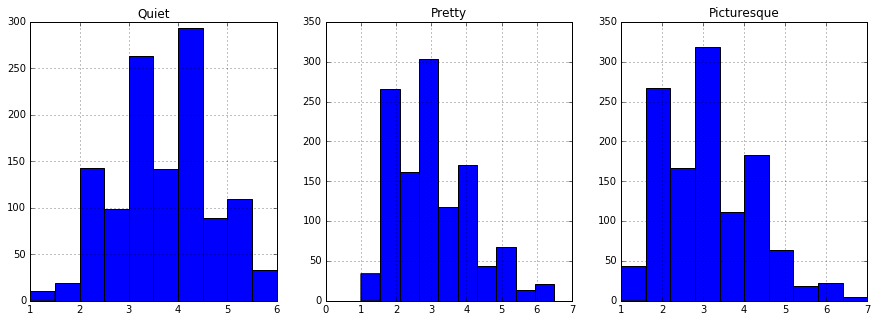

In [97]:
plt.subplot(1,3,1)
plt.title("Quiet")
df_labels['Quiet'].hist(figsize=[15,5],grid=True)
plt.subplot(1,3,2)
plt.title("Pretty")
df_labels['Pretty'].hist(figsize=[15,5],grid=True)
plt.subplot(1,3,3)
plt.title("Picturesque")
df_labels['Picturesque'].hist(figsize=[15,5],grid=True)

### Pleasant, Preserve & Wealthy

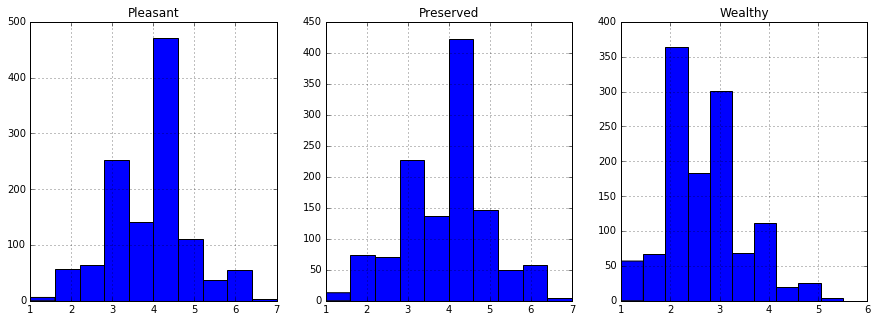

In [112]:
plt.subplot(1,3,1)
plt.title("Pleasant")
df_labels['Pleasant'].hist(figsize=[15,5],grid=True)
plt.subplot(1,3,2)
plt.title("Preserved")
df_labels['Preserved'].hist(figsize=[15,5],grid=True)
plt.subplot(1,3,3)
plt.title("Wealthy")
df_labels['Wealthy'].hist(figsize=[15,5],grid=True)

## Binarizing labels

### Unbalanced labels

In [165]:
#Dangerous
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Dangerous'].reshape(-1,1)) # >=4.0
dangerous_bin=binarizer.transform(df_labels['Dangerous'].reshape(-1,1))
dangerous_bin=pd.DataFrame(dangerous_bin)
dangerous_bin.columns=["Dangerous"]
print("1:", sum(dangerous_bin["Dangerous"]==1)/dangerous_bin.shape[0])
print("0:", sum(dangerous_bin["Dangerous"]==0)/dangerous_bin.shape[0])

1: 0.24
0: 0.76


In [166]:
#Dirty
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Dirty'].reshape(-1,1))# >=4.0
dirty_bin=binarizer.transform(df_labels['Dirty'].reshape(-1,1))
dirty_bin=pd.DataFrame(dirty_bin)
dirty_bin.columns=["Dirty"]
print("1:", sum(dirty_bin["Dirty"]==1)/dirty_bin.shape[0])
print("0:", sum(dirty_bin["Dirty"]==0)/dirty_bin.shape[0])

1: 0.309166666667
0: 0.690833333333


In [167]:
#Polluted
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Polluted'].reshape(-1,1))#>=4.0
polluted_bin=binarizer.transform(df_labels['Polluted'].reshape(-1,1))
polluted_bin=pd.DataFrame(polluted_bin)
polluted_bin.columns=["Polluted"]
print("1:", sum(polluted_bin["Polluted"]==1)/polluted_bin.shape[0])
print("0:", sum(polluted_bin["Polluted"]==0)/polluted_bin.shape[0])

1: 0.213333333333
0: 0.786666666667


In [93]:
#Interesting
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Interesting'].reshape(-1,1))#>=4.0
interesting_bin=binarizer.transform(df_labels['Interesting'].reshape(-1,1))
interesting_bin=pd.DataFrame(interesting_bin)
interesting_bin.columns=["Interesting"]
print("1:", sum(interesting_bin["Interesting"]==1)/interesting_bin.shape[0])
print("0:", sum(interesting_bin["Interesting"]==0)/interesting_bin.shape[0])

1: 0.543333333333
0: 0.456666666667


In [168]:
#Accessible
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Accessible'].reshape(-1,1))#>=4.0
accessible_bin=binarizer.transform(df_labels['Accessible'].reshape(-1,1))
accessible_bin=pd.DataFrame(accessible_bin)
accessible_bin.columns=["Accessible"]
print("1:", sum(accessible_bin["Accessible"]==1)/accessible_bin.shape[0])
print("0:", sum(accessible_bin["Accessible"]==0)/accessible_bin.shape[0])

1: 0.87
0: 0.13


In [95]:
#Happy
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Happy'].reshape(-1,1))#>=4.0
happy_bin=binarizer.transform(df_labels['Happy'].reshape(-1,1))
happy_bin=pd.DataFrame(happy_bin)
happy_bin.columns=["Happy"]
print("1:", sum(happy_bin["Happy"]==1)/happy_bin.shape[0])
print("0:", sum(happy_bin["Happy"]==0)/happy_bin.shape[0])

1: 0.508333333333
0: 0.491666666667


In [145]:
#Quiet
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Quiet'].reshape(-1,1))#>=4.0
quiet_bin=binarizer.transform(df_labels['Quiet'].reshape(-1,1))
quiet_bin=pd.DataFrame(quiet_bin)
quiet_bin.columns=["Quiet"]
print("1:", sum(quiet_bin["Quiet"]==1)/quiet_bin.shape[0])
print("0:", sum(quiet_bin["Quiet"]==0)/quiet_bin.shape[0])

1: 0.436666666667
0: 0.563333333333


In [169]:
#Pretty
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Pretty'].reshape(-1,1))#>=4.0
pretty_bin=binarizer.transform(df_labels['Pretty'].reshape(-1,1))
pretty_bin=pd.DataFrame(pretty_bin)
pretty_bin.columns=["Pretty"]
print("1:", sum(pretty_bin["Pretty"]==1)/pretty_bin.shape[0])
print("0:", sum(pretty_bin["Pretty"]==0)/pretty_bin.shape[0])

1: 0.264166666667
0: 0.735833333333


In [170]:
#Picturesque
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Picturesque'].reshape(-1,1))#>=4.0
picturesque_bin=binarizer.transform(df_labels['Picturesque'].reshape(-1,1))
picturesque_bin=pd.DataFrame(picturesque_bin)
picturesque_bin.columns=["Picturesque"]
print("1:", sum(picturesque_bin["Picturesque"]==1)/picturesque_bin.shape[0])
print("0:", sum(picturesque_bin["Picturesque"]==0)/picturesque_bin.shape[0])

1: 0.244166666667
0: 0.755833333333


In [131]:
#Pleasant
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Pleasant'].reshape(-1,1))#>=4.0
pleasant_bin=binarizer.transform(df_labels['Pleasant'].reshape(-1,1))
pleasant_bin=pd.DataFrame(pleasant_bin)
pleasant_bin.columns=["Pleasant"]
print("1:", sum(pleasant_bin["Pleasant"]==1)/pleasant_bin.shape[0])
print("0:", sum(pleasant_bin["Pleasant"]==0)/pleasant_bin.shape[0])

1: 0.565
0: 0.435


In [132]:
#Preserved
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Preserved'].reshape(-1,1))#>=4.0
preserved_bin=binarizer.transform(df_labels['Preserved'].reshape(-1,1))
preserved_bin=pd.DataFrame(preserved_bin)
preserved_bin.columns=["Preserved"]
print("1:", sum(preserved_bin["Preserved"]==1)/preserved_bin.shape[0])
print("0:", sum(preserved_bin["Preserved"]==0)/preserved_bin.shape[0])

1: 0.565833333333
0: 0.434166666667


In [171]:
#Wealthy
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Wealthy'].reshape(-1,1))#>=4.0
wealthy_bin=binarizer.transform(df_labels['Wealthy'].reshape(-1,1))
wealthy_bin=pd.DataFrame(wealthy_bin)
wealthy_bin.columns=["Wealthy"]
print("1:", sum(wealthy_bin["Wealthy"]==1)/wealthy_bin.shape[0])
print("0:", sum(wealthy_bin["Wealthy"]==0)/wealthy_bin.shape[0])

1: 0.133333333333
0: 0.866666666667


In [172]:
df_labels_bin=pd.DataFrame()
df_labels_bin=pd.concat([df_labels["annotation"],dangerous_bin, dirty_bin,pretty_bin,preserved_bin,accessible_bin,interesting_bin,picturesque_bin,wealthy_bin,quiet_bin,polluted_bin,pleasant_bin,happy_bin], axis=1)
df_labels_bin.head()

annotation  Dangerous  Dirty  Pretty  Preserved  Accessible  \
0  s_20140101_125134.jpg        0.0    0.0     1.0        1.0         1.0   
1  s_20140101_125419.jpg        0.0    0.0     0.0        1.0         1.0   
2  s_20140101_125819.jpg        0.0    0.0     1.0        1.0         1.0   
3  s_20140101_125835.jpg        1.0    1.0     0.0        1.0         1.0   
4  s_20140101_125939.jpg        0.0    0.0     1.0        1.0         1.0   

   Interesting  Picturesque  Wealthy  Quiet  Polluted  Pleasant  Happy  
0          1.0          1.0      0.0    1.0       0.0       1.0    1.0  
1          1.0          0.0      0.0    0.0       0.0       1.0    1.0  
2          1.0          1.0      0.0    0.0       0.0       1.0    1.0  
3          1.0          0.0      0.0    0.0       0.0       1.0    1.0  
4          1.0          1.0      0.0    1.0       0.0       1.0    1.0

### Balanced labels

In [15]:
#Dangerous
binarizer = sklearn.preprocessing.Binarizer(threshold=2.5).fit(df_labels['Dangerous'].reshape(-1,1)) # >=3.0
dangerous_bin=binarizer.transform(df_labels['Dangerous'].reshape(-1,1))
dangerous_bin=pd.DataFrame(dangerous_bin)
dangerous_bin.columns=["Dangerous"]
print("1:", sum(dangerous_bin["Dangerous"]==1)/dangerous_bin.shape[0])
print("0:", sum(dangerous_bin["Dangerous"]==0)/dangerous_bin.shape[0])

1: 0.59
0: 0.41


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [16]:
#Dirty
binarizer = sklearn.preprocessing.Binarizer(threshold=3.0).fit(df_labels['Dirty'].reshape(-1,1))# >=3.5
dirty_bin=binarizer.transform(df_labels['Dirty'].reshape(-1,1))
dirty_bin=pd.DataFrame(dirty_bin)
dirty_bin.columns=["Dirty"]
print("1:", sum(dirty_bin["Dirty"]==1)/dirty_bin.shape[0])
print("0:", sum(dirty_bin["Dirty"]==0)/dirty_bin.shape[0])

1: 0.424166666667
0: 0.575833333333


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [18]:
#Polluted
binarizer = sklearn.preprocessing.Binarizer(threshold=2.5).fit(df_labels['Polluted'].reshape(-1,1))#>=3.0
polluted_bin=binarizer.transform(df_labels['Polluted'].reshape(-1,1))
polluted_bin=pd.DataFrame(polluted_bin)
polluted_bin.columns=["Polluted"]
print("1:", sum(polluted_bin["Polluted"]==1)/polluted_bin.shape[0])
print("0:", sum(polluted_bin["Polluted"]==0)/polluted_bin.shape[0])

1: 0.551666666667
0: 0.448333333333


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [19]:
#Interesting
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Interesting'].reshape(-1,1))#>=4.0
interesting_bin=binarizer.transform(df_labels['Interesting'].reshape(-1,1))
interesting_bin=pd.DataFrame(interesting_bin)
interesting_bin.columns=["Interesting"]
print("1:", sum(interesting_bin["Interesting"]==1)/interesting_bin.shape[0])
print("0:", sum(interesting_bin["Interesting"]==0)/interesting_bin.shape[0])

1: 0.543333333333
0: 0.456666666667


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [20]:
#Accessible
binarizer = sklearn.preprocessing.Binarizer(threshold=4.5).fit(df_labels['Accessible'].reshape(-1,1))#>=5.0
accessible_bin=binarizer.transform(df_labels['Accessible'].reshape(-1,1))
accessible_bin=pd.DataFrame(accessible_bin)
accessible_bin.columns=["Accessible"]
print("1:", sum(accessible_bin["Accessible"]==1)/accessible_bin.shape[0])
print("0:", sum(accessible_bin["Accessible"]==0)/accessible_bin.shape[0])

1: 0.513333333333
0: 0.486666666667


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [21]:
#Happy
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Happy'].reshape(-1,1))#>=4.0
happy_bin=binarizer.transform(df_labels['Happy'].reshape(-1,1))
happy_bin=pd.DataFrame(happy_bin)
happy_bin.columns=["Happy"]
print("1:", sum(happy_bin["Happy"]==1)/happy_bin.shape[0])
print("0:", sum(happy_bin["Happy"]==0)/happy_bin.shape[0])

1: 0.508333333333
0: 0.491666666667


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [22]:
#Quiet
binarizer = sklearn.preprocessing.Binarizer(threshold=3.0).fit(df_labels['Quiet'].reshape(-1,1))#>=3.5
quiet_bin=binarizer.transform(df_labels['Quiet'].reshape(-1,1))
quiet_bin=pd.DataFrame(quiet_bin)
quiet_bin.columns=["Quiet"]
print("1:", sum(quiet_bin["Quiet"]==1)/quiet_bin.shape[0])
print("0:", sum(quiet_bin["Quiet"]==0)/quiet_bin.shape[0])

1: 0.555
0: 0.445


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [27]:
#Pretty
#Note: there is no way to get at least 40-50%
binarizer = sklearn.preprocessing.Binarizer(threshold=2.5).fit(df_labels['Pretty'].reshape(-1,1))#>=3.0
pretty_bin=binarizer.transform(df_labels['Pretty'].reshape(-1,1))
pretty_bin=pd.DataFrame(pretty_bin)
pretty_bin.columns=["Pretty"]
print("1:", sum(pretty_bin["Pretty"]==1)/pretty_bin.shape[0])
print("0:", sum(pretty_bin["Pretty"]==0)/pretty_bin.shape[0])

1: 0.615
0: 0.385


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [28]:
#Picturesque
binarizer = sklearn.preprocessing.Binarizer(threshold=2.5).fit(df_labels['Picturesque'].reshape(-1,1))#>=3.0
picturesque_bin=binarizer.transform(df_labels['Picturesque'].reshape(-1,1))
picturesque_bin=pd.DataFrame(picturesque_bin)
picturesque_bin.columns=["Picturesque"]
print("1:", sum(picturesque_bin["Picturesque"]==1)/picturesque_bin.shape[0])
print("0:", sum(picturesque_bin["Picturesque"]==0)/picturesque_bin.shape[0])

1: 0.603333333333
0: 0.396666666667


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [29]:
#Pleasant
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Pleasant'].reshape(-1,1))#>=4.0
pleasant_bin=binarizer.transform(df_labels['Pleasant'].reshape(-1,1))
pleasant_bin=pd.DataFrame(pleasant_bin)
pleasant_bin.columns=["Pleasant"]
print("1:", sum(pleasant_bin["Pleasant"]==1)/pleasant_bin.shape[0])
print("0:", sum(pleasant_bin["Pleasant"]==0)/pleasant_bin.shape[0])

1: 0.565
0: 0.435


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [30]:
#Preserved
binarizer = sklearn.preprocessing.Binarizer(threshold=3.5).fit(df_labels['Preserved'].reshape(-1,1))#>=4.0
preserved_bin=binarizer.transform(df_labels['Preserved'].reshape(-1,1))
preserved_bin=pd.DataFrame(preserved_bin)
preserved_bin.columns=["Preserved"]
print("1:", sum(preserved_bin["Preserved"]==1)/preserved_bin.shape[0])
print("0:", sum(preserved_bin["Preserved"]==0)/preserved_bin.shape[0])

1: 0.565833333333
0: 0.434166666667


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [32]:
#Wealthy
binarizer = sklearn.preprocessing.Binarizer(threshold=2.5).fit(df_labels['Wealthy'].reshape(-1,1))#>=4.0
wealthy_bin=binarizer.transform(df_labels['Wealthy'].reshape(-1,1))
wealthy_bin=pd.DataFrame(wealthy_bin)
wealthy_bin.columns=["Wealthy"]
print("1:", sum(wealthy_bin["Wealthy"]==1)/wealthy_bin.shape[0])
print("0:", sum(wealthy_bin["Wealthy"]==0)/wealthy_bin.shape[0])

1: 0.440833333333
0: 0.559166666667


/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/lemr/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [33]:
df_labels_bin_balanced=pd.DataFrame()
df_labels_bin_balanced=pd.concat([df_labels["annotation"],dangerous_bin, dirty_bin,pretty_bin,preserved_bin,accessible_bin,interesting_bin,picturesque_bin,wealthy_bin,quiet_bin,polluted_bin,pleasant_bin,happy_bin], axis=1)
df_labels_bin_balanced.head()

annotation  Dangerous  Dirty  Pretty  Preserved  Accessible  \
0  s_20140101_125134.jpg        0.0    0.0     1.0        1.0         1.0   
1  s_20140101_125419.jpg        0.0    0.0     1.0        1.0         1.0   
2  s_20140101_125819.jpg        0.0    0.0     1.0        1.0         1.0   
3  s_20140101_125835.jpg        1.0    1.0     1.0        1.0         1.0   
4  s_20140101_125939.jpg        1.0    0.0     1.0        1.0         1.0   

   Interesting  Picturesque  Wealthy  Quiet  Polluted  Pleasant  Happy  
0          1.0          1.0      1.0    1.0       0.0       1.0    1.0  
1          1.0          1.0      0.0    0.0       0.0       1.0    1.0  
2          1.0          1.0      0.0    0.0       0.0       1.0    1.0  
3          1.0          0.0      0.0    0.0       1.0       1.0    1.0  
4          1.0          1.0      0.0    1.0       0.0       1.0    1.0

# <span style="color:red"> Colors for image segmentation (150 features) </span>

In [272]:
#Getting the colors
##Based on the following code http://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green
def get_color_name(requested_colour):
    min_colours = {}
    for name, key in dict_colors["data"]:
        r_c, g_c, b_c = key
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

In [91]:
df_object_info=pd.read_csv(object_info_dir)
df_object_info.drop(["Ratio","Train","Val"],axis=1,inplace=True)
df_object_info.dropna(inplace=True)

In [187]:
#Our file
dir_color="/Users/lemr/Documents/EPFL/Segundo_Semestre/semester_project/visualizationCode/color150.mat"

#Name of the color
#For getting the color name, we based on the following dataset https://xkcd.com/color/rgb/rgb.txt
dir_rgb_file="/Users/lemr/Documents/EPFL/Segundo_Semestre/semester_project/visualizationCode/rgb.txt"

In [273]:
#Creating the dictionary for the colors.
df_colors_name=pd.read_csv(dir_rgb_file,sep="\t",header=None).drop([2],axis=1)
df_colors_name.columns=["color","rgb"]
df_colors_name['rgb']=df_colors_name['rgb'].apply(webcolors.hex_to_rgb)
dict_colors=df_colors_name.to_dict(orient="split")

In [298]:
#Getting the name of the colors for our file
df_colors=pd.DataFrame(list(scipy.io.loadmat(dir_color)["colors"]))
df_colors.columns=["R","G","B"]
df_colors["color_name"]=df_colors.apply(get_color_name,axis=1)
df_colors['RGB'] = list(zip(df_colors["R"], df_colors["G"],df_colors["B"]))
df_colors.drop(["R","G","B"],axis=1,inplace=True)
df_colors.head()

color_name              RGB
0    medium grey  (120, 120, 120)
1          mauve  (180, 120, 120)
2      aqua blue    (6, 230, 230)
3      dark grey     (80, 50, 50)
4  vibrant green      (4, 200, 3)

In [368]:
temp=[]
for i in range(1,151,1):
    temp.append("feat_"+str(i))
#Merging
df_object_colors = pd.concat([df_object_info,df_colors], axis=1)
df_object_colors["feat"]=temp
new_ratio=[]
for feat in df_features.columns:
    if feat!="id" and feat!="img_id" and feat!="feat_0":
        new_ratio.append(round(df_features[feat].sum()/len(df_features),4))
df_object_colors["ratio"]=new_ratio
df_object_colors=df_object_colors[["feat","Name","ratio","RGB","color_name"]]
df_object_colors=df_object_colors.sort_values(by=["ratio"],ascending=False).reset_index(drop=True)
df_object_colors.head(10)

feat                                               Name   ratio  \
0   feat_2                                  building, edifice  0.2915   
1  feat_12                                 sidewalk, pavement  0.1765   
2   feat_7                                        road, route  0.1539   
3   feat_3                                                sky  0.1083   
4   feat_5                                               tree  0.0480   
5   feat_1                                               wall  0.0475   
6  feat_21           car, auto, automobile, machine, motorcar  0.0384   
7   feat_4                                    floor, flooring  0.0257   
8  feat_13  person, individual, someone, somebody, mortal,...  0.0212   
9  feat_14                                      earth, ground  0.0183   

               RGB     color_name  
0  (180, 120, 120)          mauve  
1    (235, 255, 7)  bright yellow  
2  (140, 140, 140)           grey  
3    (6, 230, 230)      aqua blue  
4      (4, 200, 3)  vibrant green  
5  (120, 120, 120)    medium grey  
6    (0, 102, 200)       cerulean  
7     (80, 50, 50)      dark grey  
8     (150, 5, 61)      cranberry  
9   (120, 120, 70)           drab

In [393]:
df_object_colors.to_csv("datasets/object_info_colors_image_seg_150.csv",sep=",",index=False)

In [625]:
import numpy as np
from PIL import Image
import itertools
import collections
import glob
import operator

In [705]:
seg_img_files=glob.glob("/Users/lemr/Documents/EPFL/Segundo_Semestre/semester_project/city_seg/*.jpg")
big_dict={}
for image in seg_img_files:
    img = Image.open(image)
    #Getting size of the picture
    rgb_matrix=np.array(img)
    im_dimensions=(len(rgb_matrix[0]),len(rgb_matrix))
    rgb_pixels=list(im.getdata())
    counter=collections.Counter(rgb_pixels)
    new_list=[]
    for key in counter:
        temp=counter[key]/(im_dimensions[0]*im_dimensions[1])
        if (temp >  0.0001):
            new_list.append((key,temp))
    dict_temp=dict(new_list)
    for key in dict_temp:
        try:
            big_dict[key]
        except:
            big_dict[key]=dict_temp[key]
        else: 
            big_dict[key]=big_dict[key]+dict_temp[key]

In [743]:
image=seg_img_files[0]
img = Image.open(image)
#Getting size of the picture
rgb_matrix=np.array(img)
im_dimensions=(len(rgb_matrix[0]),len(rgb_matrix))
rgb_pixels=list(im.getdata())
counter=collections.Counter(rgb_pixels)
len(counter)

29250

In [736]:
temp=[]
df_pixel_colors=pd.DataFrame(sorted_x)
df_pixel_colors.columns=["RGB","Ratio"]
df_pixel_colors["RGB"]
for color in df_pixel_colors["RGB"]:
    temp.append(get_color_name(color))
df_pixel_colors["color"]=temp

In [738]:
df_pixel_colors.head(10)
#However, due to in the pictures we have some color gradients and not solid ones (as considered in the actual image 
#segmentation), we find different color tones in the borders of the colors (features) and that makes this color 
#analysis a bit harder and not consistent. Therefore we won't continue with the mapping of the colors to features, 
#since it's going to be difficult to do such thing.

RGB     Ratio          color
0  (180, 120, 120)  0.472936          mauve
1     (80, 50, 52)  0.334041      dark grey
2    (6, 230, 230)  0.066592      aqua blue
3  (140, 140, 140)  0.014127           grey
4    (235, 255, 7)  0.011020  bright yellow
5   (121, 119, 70)  0.009966           drab
6  (120, 120, 120)  0.005248    medium grey
7    (255, 1, 143)  0.003210       hot pink
8    (204, 5, 254)  0.001052     hot purple
9     (0, 41, 255)  0.000952      rich blue

In [741]:
df_object_colors.head(10)
#Since we were provided with a file with the RGB code corresponding to each feature (color150.mat, in which each line
#corresponds to each feature: feat_1, feat_2, feat_3, etc. in that order), it's easy to map everything.
#Finally, we mapped the color names to the RGB code and we map this to the object file that we already created before 
#(Object information)

feat                                               Name   ratio  \
0   feat_2                                  building, edifice  0.2915   
1  feat_12                                 sidewalk, pavement  0.1765   
2   feat_7                                        road, route  0.1539   
3   feat_3                                                sky  0.1083   
4   feat_5                                               tree  0.0480   
5   feat_1                                               wall  0.0475   
6  feat_21           car, auto, automobile, machine, motorcar  0.0384   
7   feat_4                                    floor, flooring  0.0257   
8  feat_13  person, individual, someone, somebody, mortal,...  0.0212   
9  feat_14                                      earth, ground  0.0183   

               RGB     color_name  
0  (180, 120, 120)          mauve  
1    (235, 255, 7)  bright yellow  
2  (140, 140, 140)           grey  
3    (6, 230, 230)      aqua blue  
4      (4, 200, 3)  vibrant green  
5  (120, 120, 120)    medium grey  
6    (0, 102, 200)       cerulean  
7     (80, 50, 50)      dark grey  
8     (150, 5, 61)      cranberry  
9   (120, 120, 70)           drab

# <span style="color:red"> PCA on Labels </span>

In [7]:
df_labels.head()

annotation  Dangerous  Dirty  Pretty  Preserved  Accessible  \
0  s_20140101_125134.jpg        2.0    2.0     5.0        5.0         5.0   
1  s_20140101_125419.jpg        2.5    3.0     3.0        4.0         5.0   
2  s_20140101_125819.jpg        2.0    2.5     5.0        6.0         6.0   
3  s_20140101_125835.jpg        4.0    4.0     3.0        4.0         5.0   
4  s_20140101_125939.jpg        3.0    3.0     5.0        5.0         6.0   

   Interesting  Picturesque  Wealthy  Quiet  Polluted  Pleasant  Happy city  
0          5.5          4.5      3.5    5.0       2.0       5.0    5.5   gc  
1          5.0          3.0      2.5    3.0       2.5       4.0    4.0   gc  
2          6.0          5.5      2.0    3.0       2.0       6.0    6.0   gc  
3          4.5          2.5      2.0    2.5       3.0       4.0    4.0   gc  
4          5.5          5.0      2.5    4.0       2.5       5.5    5.5   gc

In [26]:
#PCA
x=df_labels.drop(["annotation","city"],axis=1)
X_scaled = sklearn.preprocessing.scale(x)

pca = sklearn.decomposition.PCA(n_components=2, svd_solver='full',whiten=True)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


X=pca.transform(X_scaled)
temp=[]
for i in range(1,3,1):
    temp.append("feat_"+str(i))
X=pd.DataFrame(X) 
X.columns=temp

[ 0.6729026   0.09435345]
0.767256056412


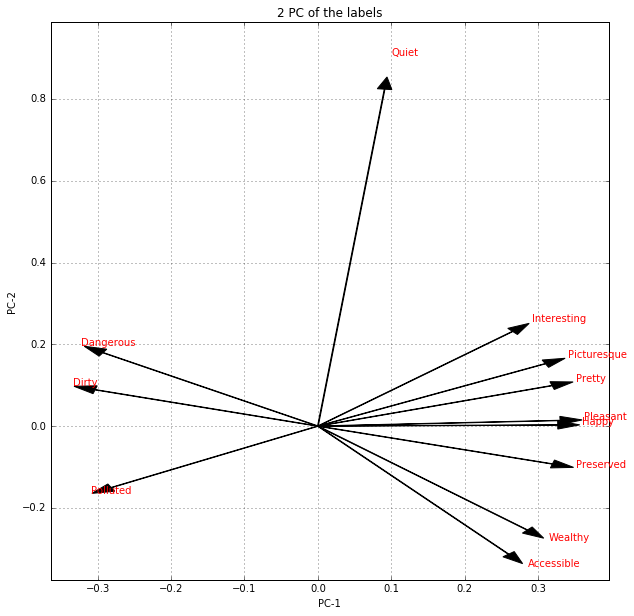

In [46]:
#Plotting the projection
xvector = pca.components_[0]
yvector = pca.components_[1]
xs = pca.transform(x)[:,0]
ys = pca.transform(x)[:,1]
min_val_x=[]
max_val_x=[]
min_val_y=[]
max_val_y=[]
plt.figure(figsize=[10,10])
plt.grid()
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i], yvector[i],fc="k", ec="k")
    plt.text(xvector[i]*1.1, yvector[i]*1.1, list(x.columns.values)[i], color='red')
    min_val_x.append(min(xvector))
    max_val_x.append(max(xvector))
    min_val_y.append(min(yvector))
    max_val_y.append(max(yvector))
plt.ylabel('PC-2')
plt.xlabel('PC-1')
plt.axis([1.2*min(min_val_x),1.2*max(max_val_x),1.2*min(min_val_y),1.2*max(max_val_y)])
plt.title("2 PC of the labels")
plt.show()

In [85]:
#Without scaling to unit variance
annotation=df_labels["annotation"].copy()
print(sum(annotation==df_labels["annotation"]))
print("Variance:\n", df_labels.drop(["annotation","city"],axis=1).var())

n_components=2
pca = sklearn.decomposition.PCA(n_components=n_components, svd_solver='full',whiten=True)
pca.fit(df_labels.drop(["annotation","city"],axis=1))
print("\nPCA Analysis")
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


pca_labels=pca.transform(df_labels.drop(["annotation","city"],axis=1))
temp=[]
for i in range(1,n_components+1,1):
    temp.append("PC_"+str(i))
pca_labels=pd.DataFrame(pca_labels) 
pca_labels.columns=temp

1200
Variance:
 Dangerous      0.985988
Dirty          1.131742
Pretty         1.036209
Preserved      1.098603
Accessible     0.891155
Interesting    0.890142
Picturesque    1.114912
Wealthy        0.774656
Quiet          1.008000
Polluted       0.848137
Pleasant       0.944732
Happy          0.909110
dtype: float64

PCA Analysis
[ 0.67672389  0.09519884]
0.771922732004


In [86]:
pca_labels.head()

PC_1      PC_2
0  1.501590  1.388268
1  0.264982 -0.315111
2  1.785879  0.018795
3 -0.222369 -0.465812
4  1.314594  0.828464

In [83]:
annotation=df_labels["annotation"].copy()
print(sum(annotation==df_labels["annotation"]))
labels_scaled = sklearn.preprocessing.scale(df_labels.drop(["annotation","city"],axis=1))
print("Variance:\n", labels_scaled.std(axis=0))

n_components=2
pca = sklearn.decomposition.PCA(n_components=n_components, svd_solver='full',whiten=True)
pca.fit(labels_scaled)
print("\nPCA Analysis")
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


pca_labels=pca.transform(labels_scaled)
temp=[]
for i in range(1,n_components+1,1):
    temp.append("PC_"+str(i))
pca_labels=pd.DataFrame(pca_labels) 
pca_labels.columns=temp

1200
Variance
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]

PCA Analysis
[ 0.6729026   0.09435345]
0.767256056412


In [88]:
pca_labels["annotation"]=annotation.copy()

In [93]:
pca_labels.head()

PC_1      PC_2             annotation
0  1.501590  1.388268  s_20140101_125134.jpg
1  0.264982 -0.315111  s_20140101_125419.jpg
2  1.785879  0.018795  s_20140101_125819.jpg
3 -0.222369 -0.465812  s_20140101_125835.jpg
4  1.314594  0.828464  s_20140101_125939.jpg

In [94]:
#Creating the dataframe that is going to be used in the R code.
df_feature
pca_labels.to_csv("datasets/pca_labels_2PC.csv",sep=",",index=False)

### Merging two datasets (image segmentation and googlenet places205)

In [65]:
df_places205=pd.read_csv("datasets/googlenet_places205_for_python.csv",sep=",")
df_features = pd.read_csv(csv_feat_dir,sep=",")
df_places205.drop(["prob"],axis=1,inplace=True)
df_features.drop(["id","feat_0"],axis=1,inplace=True)

In [84]:
list_col=df_places205.columns.tolist()
list_col[0]="img_id"
df_places205.columns=list_col

In [85]:
df_places205.head()

img_id  feat_places205_1  feat_places205_2  \
0  s_20140101_125134.jpg          0.000100          0.000006   
1  s_20140101_125419.jpg          0.001102          0.000028   
2  s_20140101_125819.jpg          0.003951          0.000007   
3  s_20140101_125835.jpg          0.000294          0.001060   
4  s_20140101_125939.jpg          0.000827          0.000017   

   feat_places205_3  feat_places205_4  feat_places205_5  feat_places205_6  \
0          0.877149          0.000044          0.000086          0.000002   
1          0.294856          0.000114          0.000283          0.000011   
2          0.023215          0.000105          0.000565          0.000006   
3          0.074381          0.000237          0.028027          0.000167   
4          0.765077          0.000071          0.000867          0.000012   

   feat_places205_7  feat_places205_8  feat_places205_9         ...          \
0          0.000048          0.000778          0.000096         ...           
1          0.000479          0.000792          0.000143         ...           
2          0.000772          0.001227          0.000030         ...           
3          0.000605          0.001721          0.000298         ...           
4          0.000655          0.006800          0.000053         ...           

   feat_places205_196  feat_places205_197  feat_places205_198  \
0            0.000209            0.000031            0.000027   
1            0.000085            0.000343            0.001344   
2            0.000021            0.000082            0.000093   
3            0.000331            0.002835            0.000720   
4            0.000024            0.002500            0.000037   

   feat_places205_199  feat_places205_200  feat_places205_201  \
0            0.000006            0.000102        2.400000e-07   
1            0.000016            0.002066        4.060000e-06   
2            0.000004            0.000174        2.000000e-06   
3            0.000076            0.004734        7.700000e-06   
4            0.000005            0.000788        1.060000e-06   

   feat_places205_202  feat_places205_203  feat_places205_204  \
0            0.000002            0.000005            0.000048   
1            0.000048            0.000045            0.000321   
2            0.000004            0.000004            0.000072   
3            0.000118            0.000430            0.002927   
4            0.000014            0.000041            0.000214   

   feat_places205_205  
0            0.000130  
1            0.000814  
2            0.000161  
3            0.000330  
4            0.000094  

[5 rows x 206 columns]

In [86]:
df_features.head()

img_id    feat_1    feat_2    feat_3    feat_4    feat_5  \
0  s_20140101_125134.jpg  0.007447  0.495103  0.075117  0.352118  0.000359   
1  s_20140101_125419.jpg  0.000000  0.390094  0.314747  0.008074  0.000000   
2  s_20140101_125819.jpg  0.000000  0.284519  0.148422  0.026618  0.030529   
3  s_20140101_125835.jpg  0.000000  0.470173  0.035024  0.000000  0.000000   
4  s_20140101_125939.jpg  0.006698  0.612354  0.063612  0.000000  0.002196   

   feat_6    feat_7    feat_8  feat_9    ...     feat_141  feat_142  feat_143  \
0     0.0  0.022035  0.002386     0.0    ...          0.0       0.0       0.0   
1     0.0  0.089085  0.000000     0.0    ...          0.0       0.0       0.0   
2     0.0  0.025390  0.000000     0.0    ...          0.0       0.0       0.0   
3     0.0  0.112055  0.000000     0.0    ...          0.0       0.0       0.0   
4     0.0  0.181298  0.000000     0.0    ...          0.0       0.0       0.0   

   feat_144  feat_145  feat_146  feat_147  feat_148  feat_149  feat_150  
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 151 columns]

In [88]:
df_merge=pd.merge(df_places205,df_features,on="img_id",how="inner")

In [124]:
is_feat=[]
for i in range(150):
    is_feat.append("IS_feat_"+str(i+1))
places_feat=[]
for i in range(205):
    places_feat.append("p205_feat_"+str(i+1))

In [126]:
columns=places_feat+is_feat

In [130]:
img_id=df_merge["img_id"]
X=df_merge.drop(["img_id"],axis=1)
X=pd.DataFrame(sklearn.preprocessing.scale(X))
X.columns=columns
X["image"]=img_id
X.head()
X.to_csv("datasets/places205_is_standardized.csv",sep=",",index=False)

In [140]:
X.head()

p205_feat_1  p205_feat_2  p205_feat_3  p205_feat_4  p205_feat_5  \
0    -0.189594    -0.202891     1.699306    -0.111094    -0.204613   
1    -0.091569    -0.191534    -0.192010    -0.103581    -0.190435   
2     0.187170    -0.202235    -1.074315    -0.104553    -0.170216   
3    -0.170603     0.333621    -0.908122    -0.090372     1.800232   
4    -0.118488    -0.197238     1.335292    -0.108239    -0.148570   

   p205_feat_6  p205_feat_7  p205_feat_8  p205_feat_9  p205_feat_10  \
0    -0.214261    -0.181414    -0.159317    -0.092251     -0.134925   
1    -0.188527    -0.083113    -0.158800    -0.081813     -0.095927   
2    -0.202595    -0.016472    -0.142035    -0.107238     -0.144942   
3     0.218573    -0.054471    -0.123016    -0.046834     -0.020585   
4    -0.186726    -0.043145     0.072485    -0.102027     -0.138596   

           ...            IS_feat_142  IS_feat_143  IS_feat_144  IS_feat_145  \
0          ...               -0.05001    -0.046941    -0.029805    -0.067911   
1          ...               -0.05001    -0.046941    -0.029805    -0.067911   
2          ...               -0.05001    -0.046941    -0.029805    -0.067911   
3          ...               -0.05001    -0.046941    -0.029805    -0.067911   
4          ...               -0.05001    -0.046941    -0.029805    -0.067911   

   IS_feat_146  IS_feat_147  IS_feat_148  IS_feat_149  IS_feat_150  \
0     -0.02888     -0.02888    -0.038038    -0.072385     -0.07601   
1     -0.02888     -0.02888    -0.038038    -0.072385     -0.07601   
2     -0.02888     -0.02888    -0.038038    -0.072385     -0.07601   
3     -0.02888     -0.02888    -0.038038    -0.072385     -0.07601   
4     -0.02888     -0.02888    -0.038038    -0.072385     -0.07601   

                   image  
0  s_20140101_125134.jpg  
1  s_20140101_125419.jpg  
2  s_20140101_125819.jpg  
3  s_20140101_125835.jpg  
4  s_20140101_125939.jpg  

[5 rows x 356 columns]